Genome info : mm10

In [2]:
here::here()

[1] "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/Datasets/GENE_EXPRESSION/MOUSE/STROKE/2022_Zheng_K_et_al/28_10_24"

In [3]:
# load the R environment spesific to Seurat:

my_seurat_lib <- "/home/ykazci/.guix-extra-profiles/seurat_signac/my_seurat_signac/site-library"

In [4]:
.libPaths()

[1] "/fast/home/y/ykazci/R/x86_64-unknown-linux-gnu-library/4.3"               
[2] "/gnu/store/5bw3l7k55lrjdcvgmb3q7c2vh7k61liy-profile/site-library"         
[3] "/gnu/store/29x2k7i71g9xq09xmbj1lk515cl7if63-r-minimal-4.4.2/lib/R/library"

In [5]:
.libPaths(new = my_seurat_lib, include.site = FALSE)

In [6]:
.libPaths()

[1] "/gnu/store/38mgs84gcfw2lv60z81y3w7mvxspmvvs-profile/site-library"         
[2] "/gnu/store/29x2k7i71g9xq09xmbj1lk515cl7if63-r-minimal-4.4.2/lib/R/library"

In [7]:
library(Seurat)

Loading required package: SeuratObject

Loading required package: sp


Attaching package: 'SeuratObject'


The following objects are masked from 'package:base':

    intersect, t




In [8]:
zheng_et_al_seurat <- readRDS(here::here('r_objects', 'zheng_et_al_seurat.RDS'))

In [9]:
zheng_et_al_seurat

An object of class Seurat 
19707 features across 58528 samples within 1 assay 
Active assay: RNA (19707 features, 0 variable features)
 1 layer present: counts
 4 dimensional reductions calculated: Xpca_, XscVI_, XscVImde_, Xumap_

In [10]:
zheng_et_al_seurat@assays$RNA

Assay (v5) data with 19707 features for 58528 cells
First 10 features:
 Xkr4, Gm1992, Rp1, Sox17, Gm37323, Mrpl15, Lypla1, Gm37988, Tcea1,
Rgs20 
Layers:
 counts 

In [11]:
zheng_et_al_seurat@assays$RNA$counts |> head()

  [[ suppressing 34 column names 'AAACCTGAGCGAAGGG-1-GSM5319988_sham2_', 'AAACCTGAGCTAACAA-1-GSM5319988_sham2_', 'AAACCTGAGGCTAGCA-1-GSM5319988_sham2_' ... ]]



6 x 58528 sparse Matrix of class "dgCMatrix"
                                                                           
Xkr4    . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Gm1992  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Rp1     . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Sox17   1 1 . . . 3 1 . . 4 1 . . . . 1 1 . . . 3 . . . . 1 . . 3 . . 3 1 .
Gm37323 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
Mrpl15  . . 1 . . . . . . 1 . 1 . . . . . . . . 1 . . . 1 . 1 . . 1 . . . .
              
Xkr4    ......
Gm1992  ......
Rp1     ......
Sox17   ......
Gm37323 ......
Mrpl15  ......

 .....suppressing 58494 columns in show(); maybe adjust options(max.print=, width=)
 ..............................

In [15]:
zheng_et_al_seurat$predicted_doublet |> table()


FALSE  TRUE 
56658  1870 

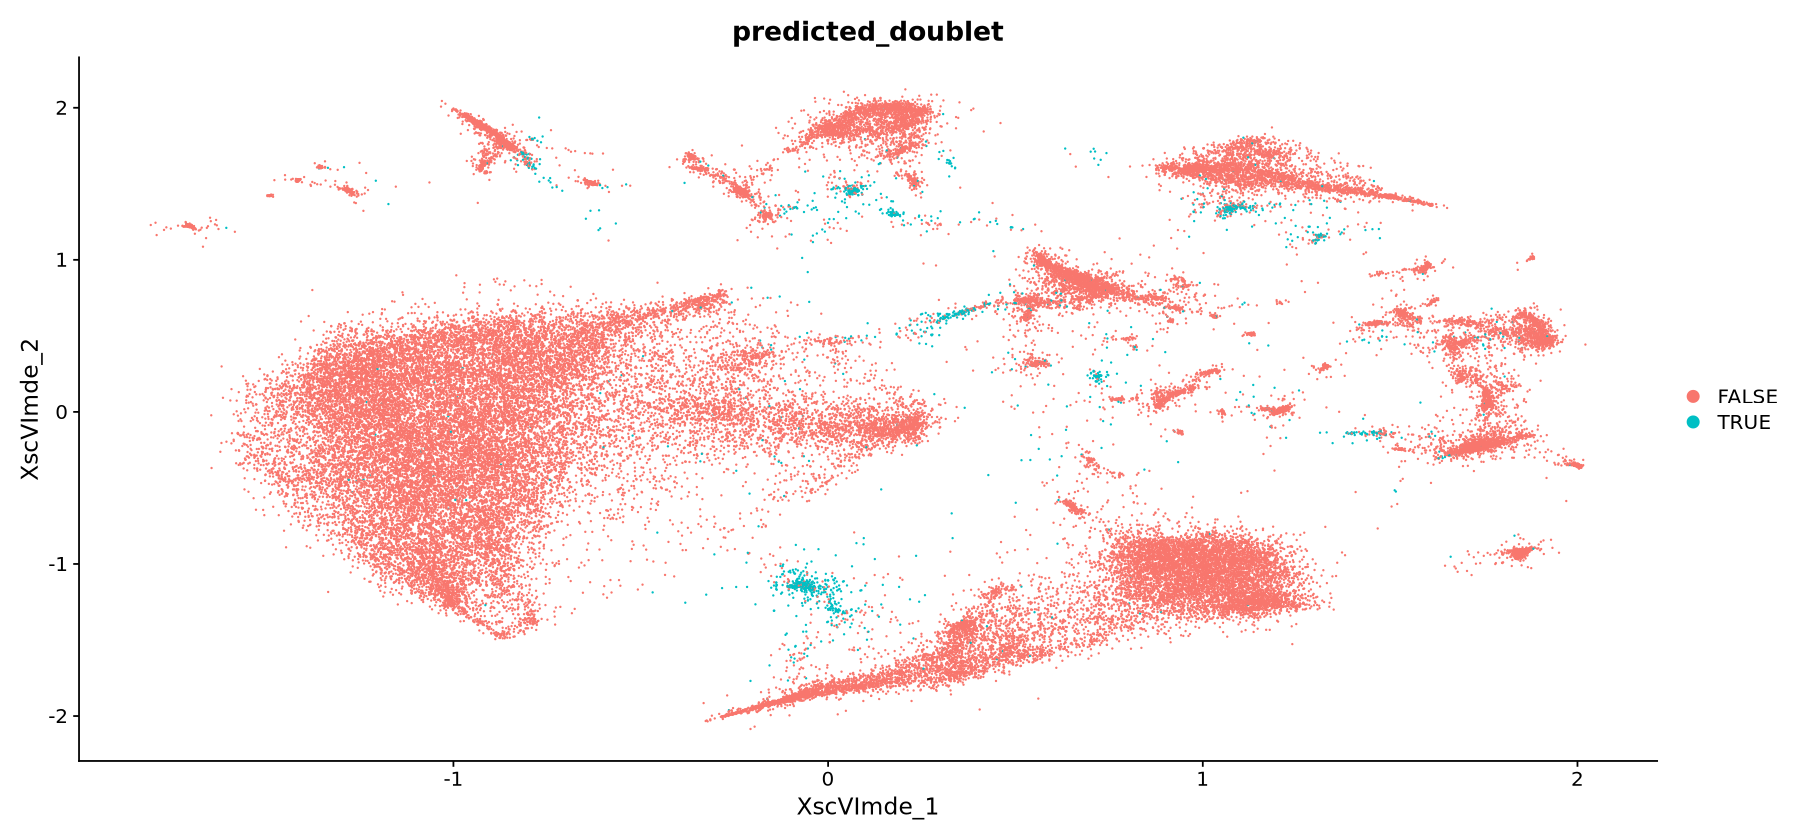

In [17]:
options(repr.plot.width = 15, repr.plot.height = 7)

DimPlot(object = zheng_et_al_seurat, reduction = "XscVImde_", group.by = "predicted_doublet")

In [18]:
my_theme <- ggplot2::theme(
    axis.title.x = ggplot2::element_text(size = 14),  # X-axis title size
    axis.title.y = ggplot2::element_text(size = 14),  # Y-axis title size
    axis.text.x  = ggplot2::element_text(size = 14, angle = 45, hjust = 1),  # X-axis tick labels
    axis.text.y  = ggplot2::element_text(size = 14),  # Y-axis tick labels
    legend.text  = ggplot2::element_text(size = 15)   # Legend text size
)

In [20]:
my_colours = c(
    "#5A5156FF", "#F6222EFF", "#FE00FAFF", "#16FF32FF",
    "#3283FEFF", "#FEAF16FF", "#B00068FF", "#1CFFCEFF", "#90AD1CFF",
    "#2ED9FFFF", "#DEA0FDFF", "#AA0DFEFF", "#F8A19FFF", "#325A9BFF",
    "#C4451CFF", "#1C8356FF", "#85660DFF", "#B10DA1FF", "#FBE426FF",
    "#1CBE4FFF", "#FA0087FF", "#FC1CBFFF", "#F7E1A0FF", "#C075A6FF",
    "#782AB6FF", "#AAF400FF", "#BDCDFFFF", "#822E1CFF", "#B5EFB5FF",
    "#7ED7D1FF", "#1C7F93FF", "#D85FF7FF", "#683B79FF", "#66B0FFFF",
    "#3B00FBFF"
)

In [21]:
zheng_et_al_seurat

An object of class Seurat 
19707 features across 58528 samples within 1 assay 
Active assay: RNA (19707 features, 0 variable features)
 1 layer present: counts
 4 dimensional reductions calculated: Xpca_, XscVI_, XscVImde_, Xumap_

================================================================================

- Leiden clusters were identified before scvi integration so I will remove them

In [25]:
zheng_et_al_seurat$leiden <- NULL

In [28]:
# view total counts and mito percentages.

# remove doublets.

# Find markers.

# Annotate cells.

In [29]:
zheng_et_al_seurat

An object of class Seurat 
19707 features across 58528 samples within 1 assay 
Active assay: RNA (19707 features, 0 variable features)
 1 layer present: counts
 4 dimensional reductions calculated: Xpca_, XscVI_, XscVImde_, Xumap_

In [34]:
temp_df <- zheng_et_al_seurat[[]] |> dplyr::select(nCount_RNA, `_index`) |> dplyr::arrange(desc(nCount_RNA)) 

In [44]:
temp_df |> summary()

   nCount_RNA       _index         
 Min.   : 1401   Length:58528      
 1st Qu.: 2072   Class :character  
 Median : 2677   Mode  :character  
 Mean   : 3384                     
 3rd Qu.: 3984                     
 Max.   :37380                     

In [48]:
# Sort data in descending order
temp_df <- temp_df  |> 
  dplyr::arrange(desc(nCount_RNA))  |> 
  dplyr::mutate(rank = dplyr::row_number())  # Assign barcode rank

In [49]:
library(ggplot2)

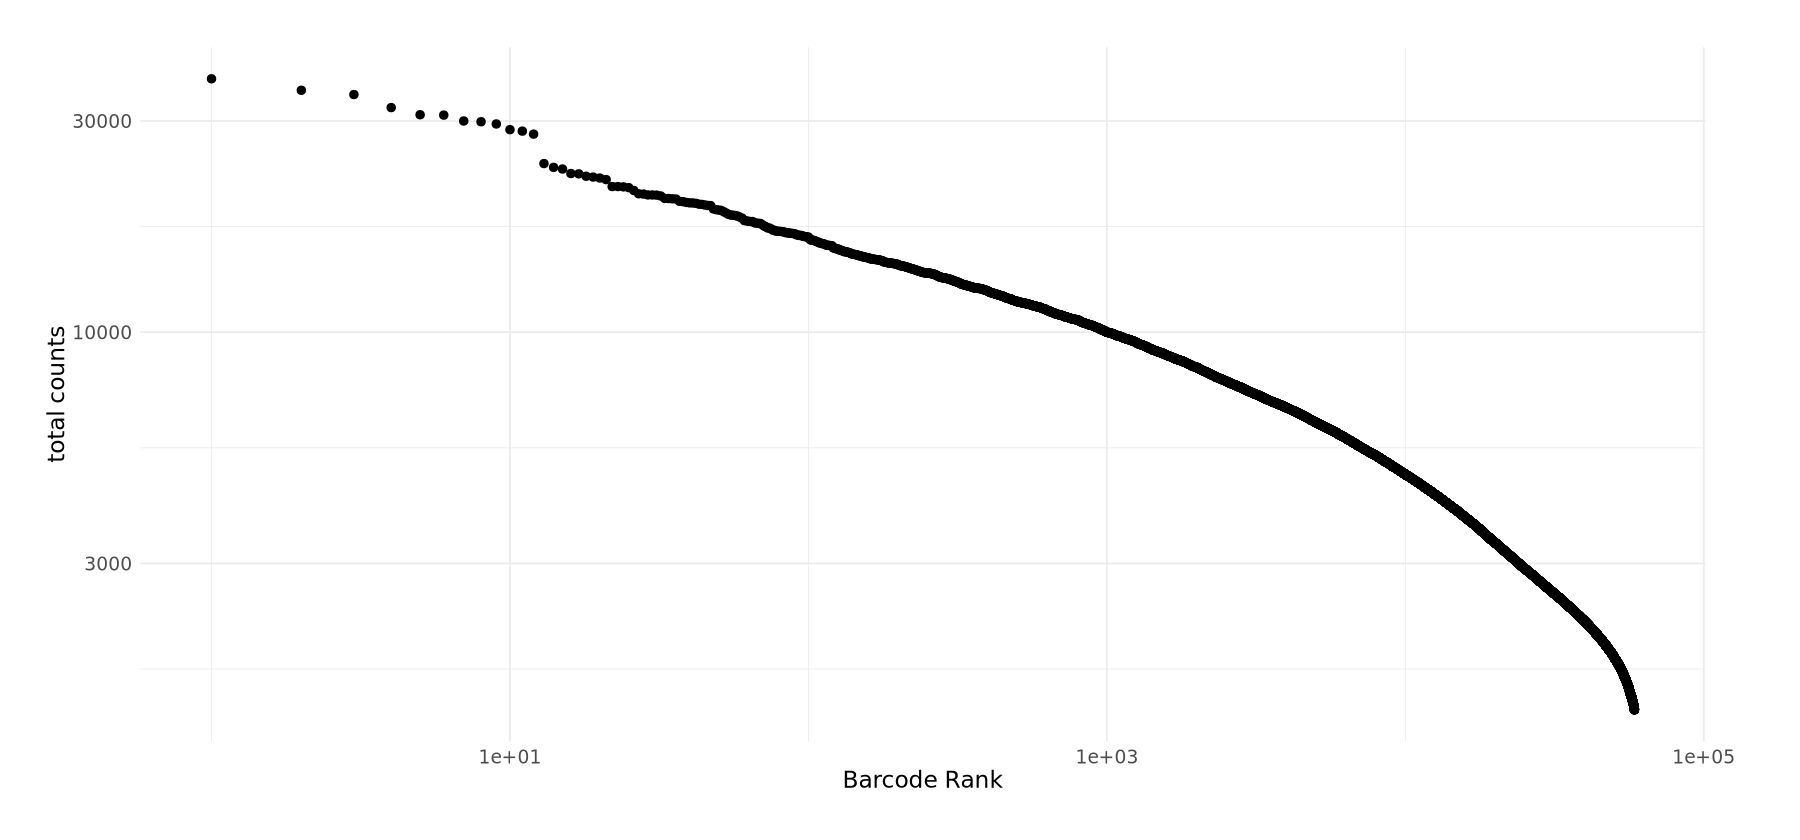

In [56]:
options(repr.plot.width = 15, repr.plot.height = 7)

ggplot(temp_df, aes(x = rank, y = nCount_RNA)) +
  geom_point(size = 2, color = "black") +  # Scatter plot for barcode rank
  scale_y_log10() +  # Log scale for UMI counts
  scale_x_log10() +  # Log scale for barcode rank
  labs(x = "Barcode Rank", y = "total counts") +
  theme_minimal() +
  theme(text = element_text(size = 14), plot.margin = unit(c(1, 2, 1, 1), "cm"))

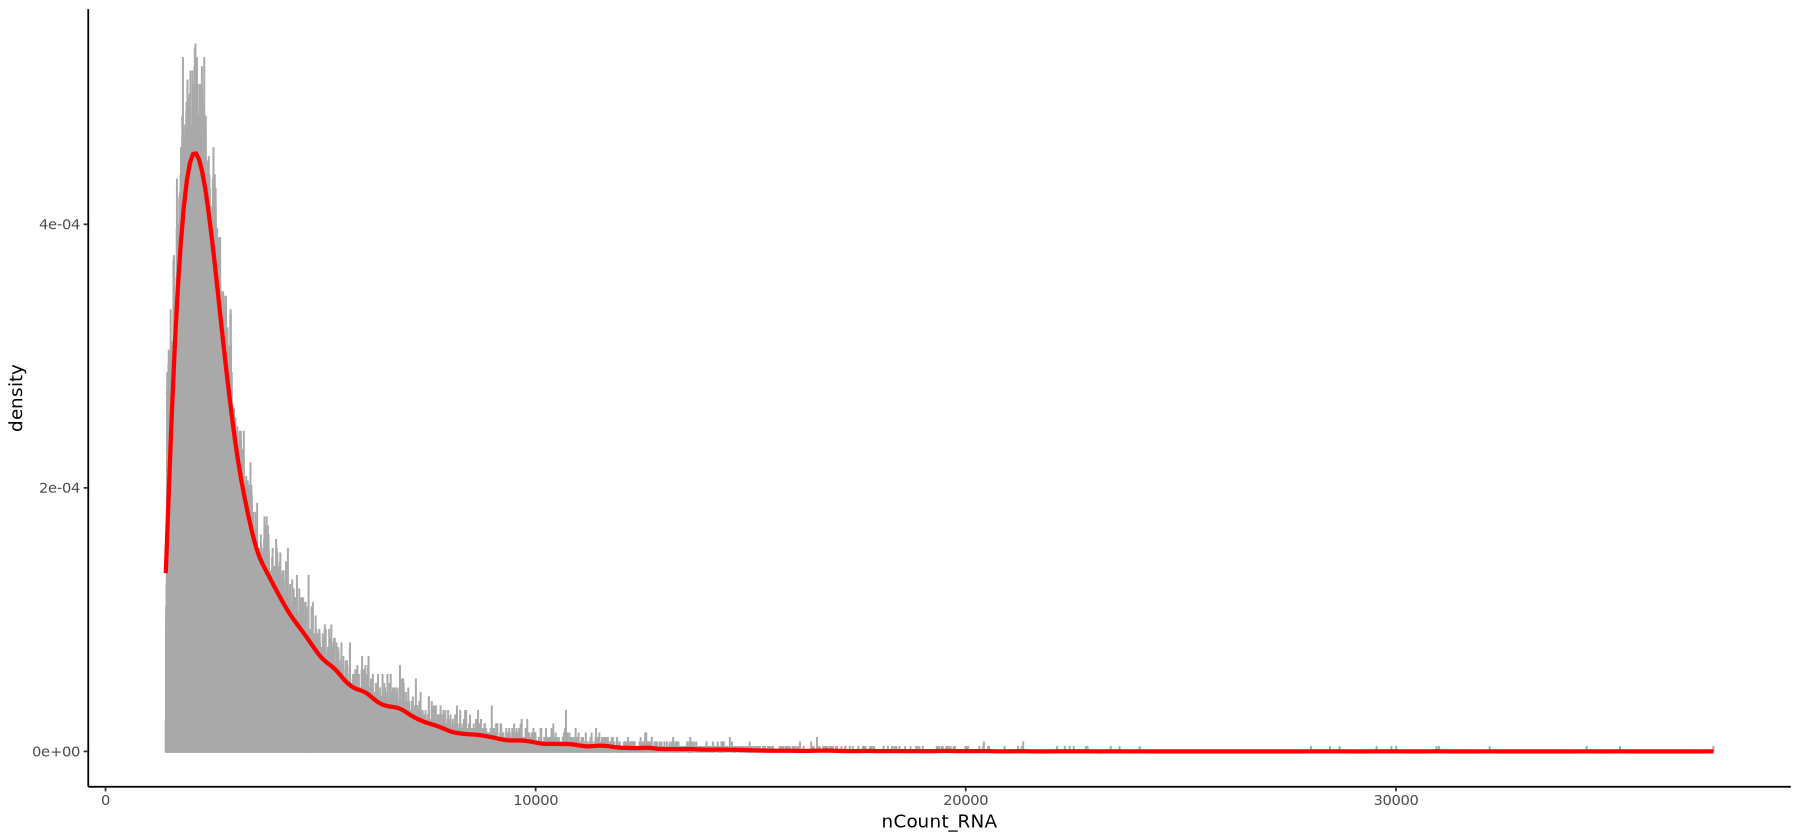

In [59]:
zheng_et_al_seurat@meta.data  |>  
  ggplot(mapping = aes(x = nCount_RNA)) +
  # Customizing the histogram colors
  geom_histogram(aes(y = after_stat(density)), colour = "darkgray", fill = "lightblue", binwidth = 5) + 
  # Customizing the density line color
  geom_density(colour = "red", linewidth = 1.2) + 
  # Classic theme
  theme_classic() +
  # Adjusting the size of legend text
  theme(legend.text = element_text(size = 12))

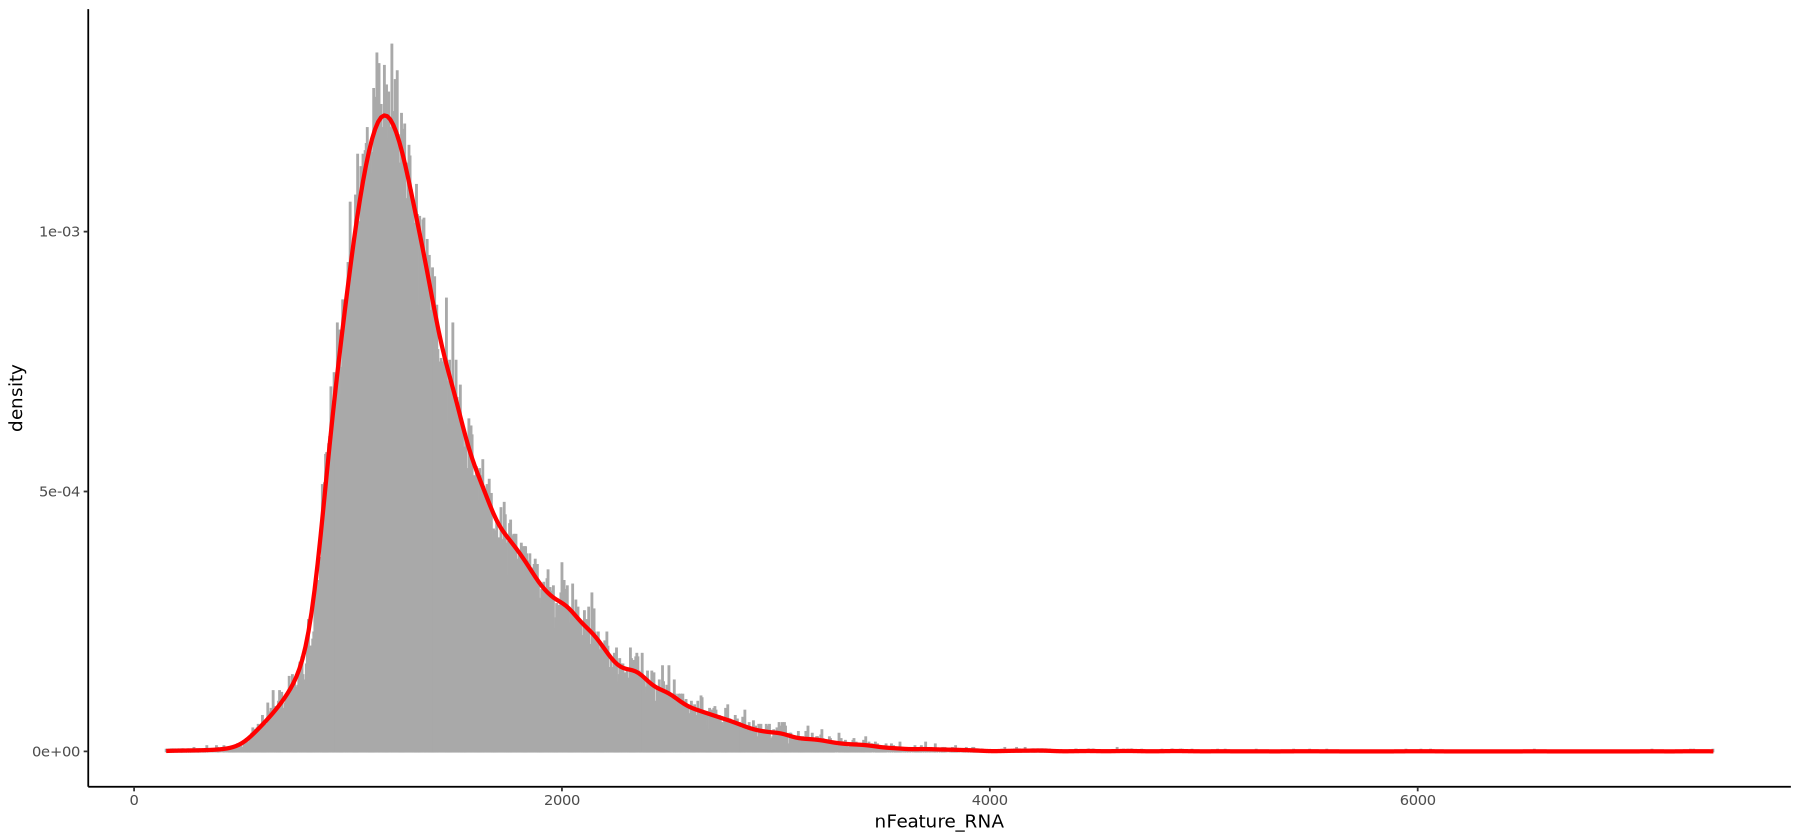

In [60]:
zheng_et_al_seurat@meta.data  |>  
  ggplot(mapping = aes(x = nFeature_RNA)) +
  # Customizing the histogram colors
  geom_histogram(aes(y = after_stat(density)), colour = "darkgray", fill = "lightblue", binwidth = 5) + 
  # Customizing the density line color
  geom_density(colour = "red", linewidth = 1.2) + 
  # Classic theme
  theme_classic() +
  # Adjusting the size of legend text
  theme(legend.text = element_text(size = 12))

In [61]:
rownames(zheng_et_al_seurat) |> head()

[1] "Xkr4"    "Gm1992"  "Rp1"     "Sox17"   "Gm37323" "Mrpl15"

In [62]:
my_theme <- ggplot2::theme(
    axis.title.x = ggplot2::element_text(size = 14),  # X-axis title size
    axis.title.y = ggplot2::element_text(size = 14),  # Y-axis title size
    axis.text.x  = ggplot2::element_text(size = 14, angle = 45, hjust = 1),  # X-axis tick labels
    axis.text.y  = ggplot2::element_text(size = 14),  # Y-axis tick labels
    legend.text  = ggplot2::element_text(size = 15)   # Legend text size
)

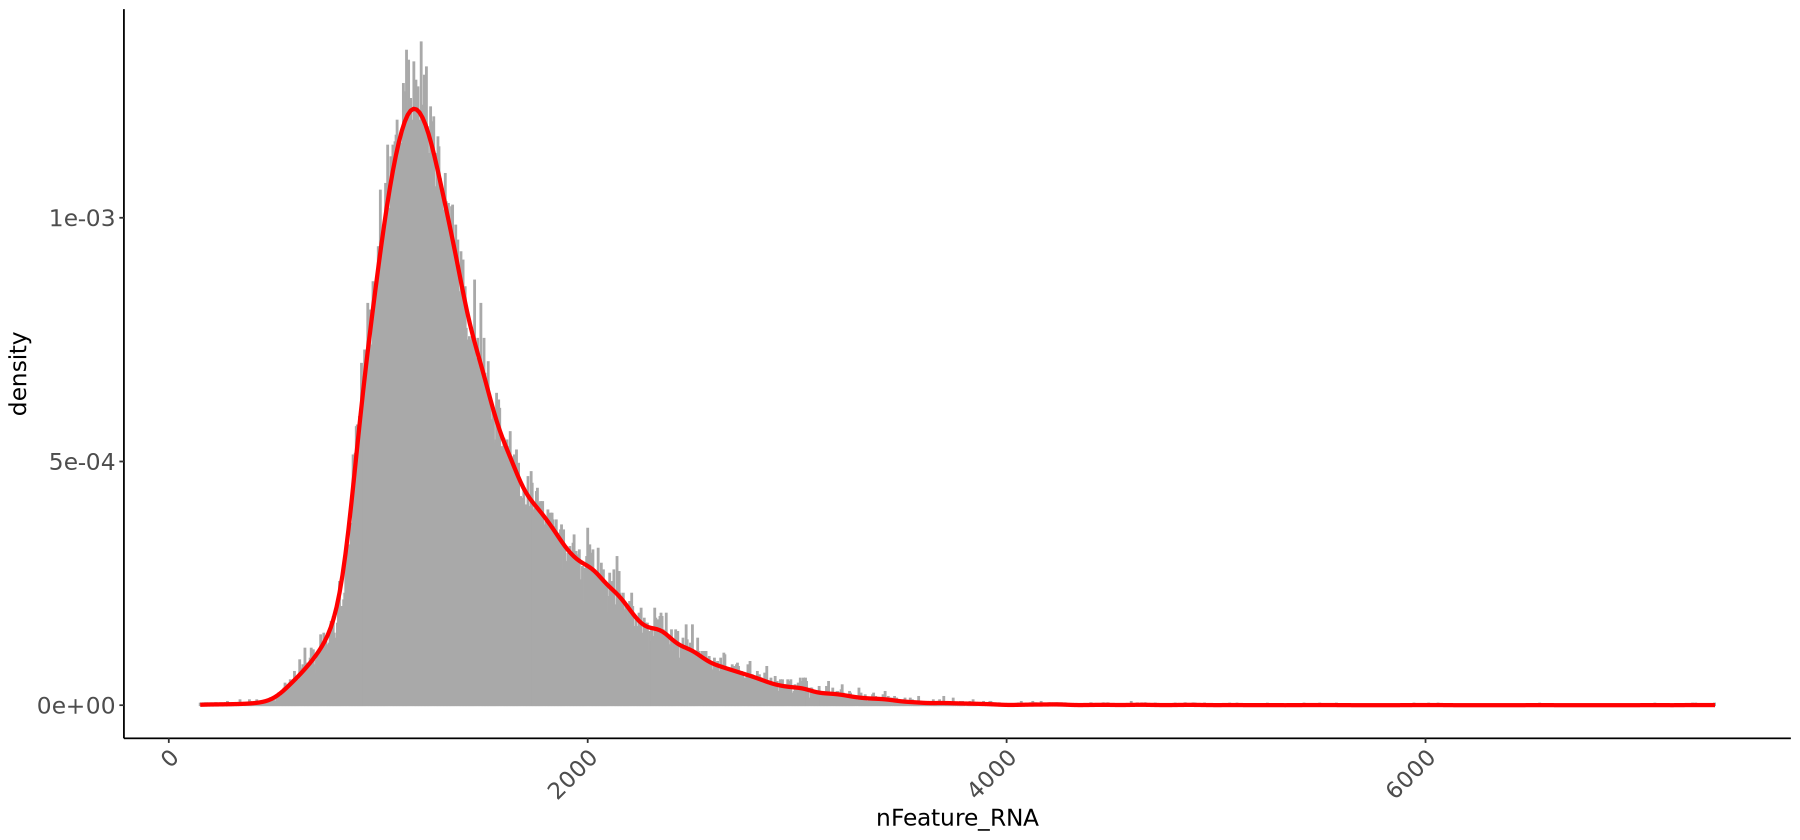

In [63]:
zheng_et_al_seurat@meta.data  |>  
  ggplot(mapping = aes(x = nFeature_RNA)) +
  # Customizing the histogram colors
  geom_histogram(aes(y = after_stat(density)), colour = "darkgray", fill = "lightblue", binwidth = 5) + 
  # Customizing the density line color
  geom_density(colour = "red", linewidth = 1.2) + 
  # Classic theme
  theme_classic() +
  # Adjusting the size of legend text
  theme(legend.text = element_text(size = 12)) + 
  my_theme

In [64]:
my_colours = c(
    "#5A5156FF", "#F6222EFF", "#FE00FAFF", "#16FF32FF",
    "#3283FEFF", "#FEAF16FF", "#B00068FF", "#1CFFCEFF", "#90AD1CFF",
    "#2ED9FFFF", "#DEA0FDFF", "#AA0DFEFF", "#F8A19FFF", "#325A9BFF",
    "#C4451CFF", "#1C8356FF", "#85660DFF", "#B10DA1FF", "#FBE426FF",
    "#1CBE4FFF", "#FA0087FF", "#FC1CBFFF", "#F7E1A0FF", "#C075A6FF",
    "#782AB6FF", "#AAF400FF", "#BDCDFFFF", "#822E1CFF", "#B5EFB5FF",
    "#7ED7D1FF", "#1C7F93FF", "#D85FF7FF", "#683B79FF", "#66B0FFFF",
    "#3B00FBFF"
)

In [65]:
zheng_et_al_seurat@active.assay

[1] "RNA"

In [73]:
zheng_et_al_seurat |> levels() 

[1] "SeuratProject"

In [74]:
zheng_et_al_seurat[[]] |> head()

orig.ident    nCount_RNA nFeature_RNA
AAACCTGAGCGAAGGG-1-GSM5319988_sham2_ SeuratProject 1438        933        
AAACCTGAGCTAACAA-1-GSM5319988_sham2_ SeuratProject 1603        983        
AAACCTGAGGCTAGCA-1-GSM5319988_sham2_ SeuratProject 2384       1298        
AAACCTGAGGTGCACA-1-GSM5319988_sham2_ SeuratProject 2906       1309        
AAACCTGAGTTTAGGA-1-GSM5319988_sham2_ SeuratProject 2928       1164        
AAACCTGCAACACGCC-1-GSM5319988_sham2_ SeuratProject 2153       1175        
                                     _index                              
AAACCTGAGCGAAGGG-1-GSM5319988_sham2_ AAACCTGAGCGAAGGG-1-GSM5319988_sham2_
AAACCTGAGCTAACAA-1-GSM5319988_sham2_ AAACCTGAGCTAACAA-1-GSM5319988_sham2_
AAACCTGAGGCTAGCA-1-GSM5319988_sham2_ AAACCTGAGGCTAGCA-1-GSM5319988_sham2_
AAACCTGAGGTGCACA-1-GSM5319988_sham2_ AAACCTGAGGTGCACA-1-GSM5319988_sham2_
AAACCTGAGTTTAGGA-1-GSM5319988_sham2_ AAACCTGAGTTTAGGA-1-GSM5319988_sham2_
AAACCTGCAACACGCC-1-GSM5319988_sham2_ AAACCTGCAACACGCC-1-GSM5319988_sham2_
                                     sample            n_genes_by_counts
AAACCTGAGCGAAGGG-1-GSM5319988_sham2_ GSM5319988_sham2_  933             
AAACCTGAGCTAACAA-1-GSM5319988_sham2_ GSM5319988_sham2_  983             
AAACCTGAGGCTAGCA-1-GSM5319988_sham2_ GSM5319988_sham2_ 1298             
AAACCTGAGGTGCACA-1-GSM5319988_sham2_ GSM5319988_sham2_ 1309             
AAACCTGAGTTTAGGA-1-GSM5319988_sham2_ GSM5319988_sham2_ 1164             
AAACCTGCAACACGCC-1-GSM5319988_sham2_ GSM5319988_sham2_ 1175             
                                     log1p_n_genes_by_counts total_counts
AAACCTGAGCGAAGGG-1-GSM5319988_sham2_ 6.839476                1438        
AAACCTGAGCTAACAA-1-GSM5319988_sham2_ 6.891626                1603        
AAACCTGAGGCTAGCA-1-GSM5319988_sham2_ 7.169350                2384        
AAACCTGAGGTGCACA-1-GSM5319988_sham2_ 7.177782                2906        
AAACCTGAGTTTAGGA-1-GSM5319988_sham2_ 7.060476                2928        
AAACCTGCAACACGCC-1-GSM5319988_sham2_ 7.069874                2153        
                                     log1p_total_counts
AAACCTGAGCGAAGGG-1-GSM5319988_sham2_ 7.271704          
AAACCTGAGCTAACAA-1-GSM5319988_sham2_ 7.380256          
AAACCTGAGGCTAGCA-1-GSM5319988_sham2_ 7.776955          
AAACCTGAGGTGCACA-1-GSM5319988_sham2_ 7.974877          
AAACCTGAGTTTAGGA-1-GSM5319988_sham2_ 7.982416          
AAACCTGCAACACGCC-1-GSM5319988_sham2_ 7.675082          
                                     pct_counts_in_top_50_genes ...
AAACCTGAGCGAAGGG-1-GSM5319988_sham2_ 25.03477                   ...
AAACCTGAGCTAACAA-1-GSM5319988_sham2_ 27.57330                   ...
AAACCTGAGGCTAGCA-1-GSM5319988_sham2_ 27.68456                   ...
AAACCTGAGGTGCACA-1-GSM5319988_sham2_ 30.17894                   ...
AAACCTGAGTTTAGGA-1-GSM5319988_sham2_ 36.74863                   ...
AAACCTGCAACACGCC-1-GSM5319988_sham2_ 29.95820                   ...
                                     pct_counts_ribo total_counts_hb
AAACCTGAGCGAAGGG-1-GSM5319988_sham2_ 0               0              
AAACCTGAGCTAACAA-1-GSM5319988_sham2_ 0               0              
AAACCTGAGGCTAGCA-1-GSM5319988_sham2_ 0               0              
AAACCTGAGGTGCACA-1-GSM5319988_sham2_ 0               0              
AAACCTGAGTTTAGGA-1-GSM5319988_sham2_ 0               0              
AAACCTGCAACACGCC-1-GSM5319988_sham2_ 0               0              
                                     log1p_total_counts_hb pct_counts_hb
AAACCTGAGCGAAGGG-1-GSM5319988_sham2_ 0                     0            
AAACCTGAGCTAACAA-1-GSM5319988_sham2_ 0                     0            
AAACCTGAGGCTAGCA-1-GSM5319988_sham2_ 0                     0            
AAACCTGAGGTGCACA-1-GSM5319988_sham2_ 0                     0            
AAACCTGAGTTTAGGA-1-GSM5319988_sham2_ 0                     0            
AAACCTGCAACACGCC-1-GSM5319988_sham2_ 0                     0            
                                     n_genes doublet_score predicted_doublet
AAACCTGAGCGAAGGG-1-GSM5319

In [75]:
zheng_et_al_seurat$sample |> table()


GSM5319987_sham1_ GSM5319988_sham2_ GSM5319989_sham3_ GSM5319990_MCAO1_ 
             8771              8540              9980             11772 
GSM5319991_MCAO2_ GSM5319992_MCAO3_ 
            11361              8104 

Warning message:
"Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead."


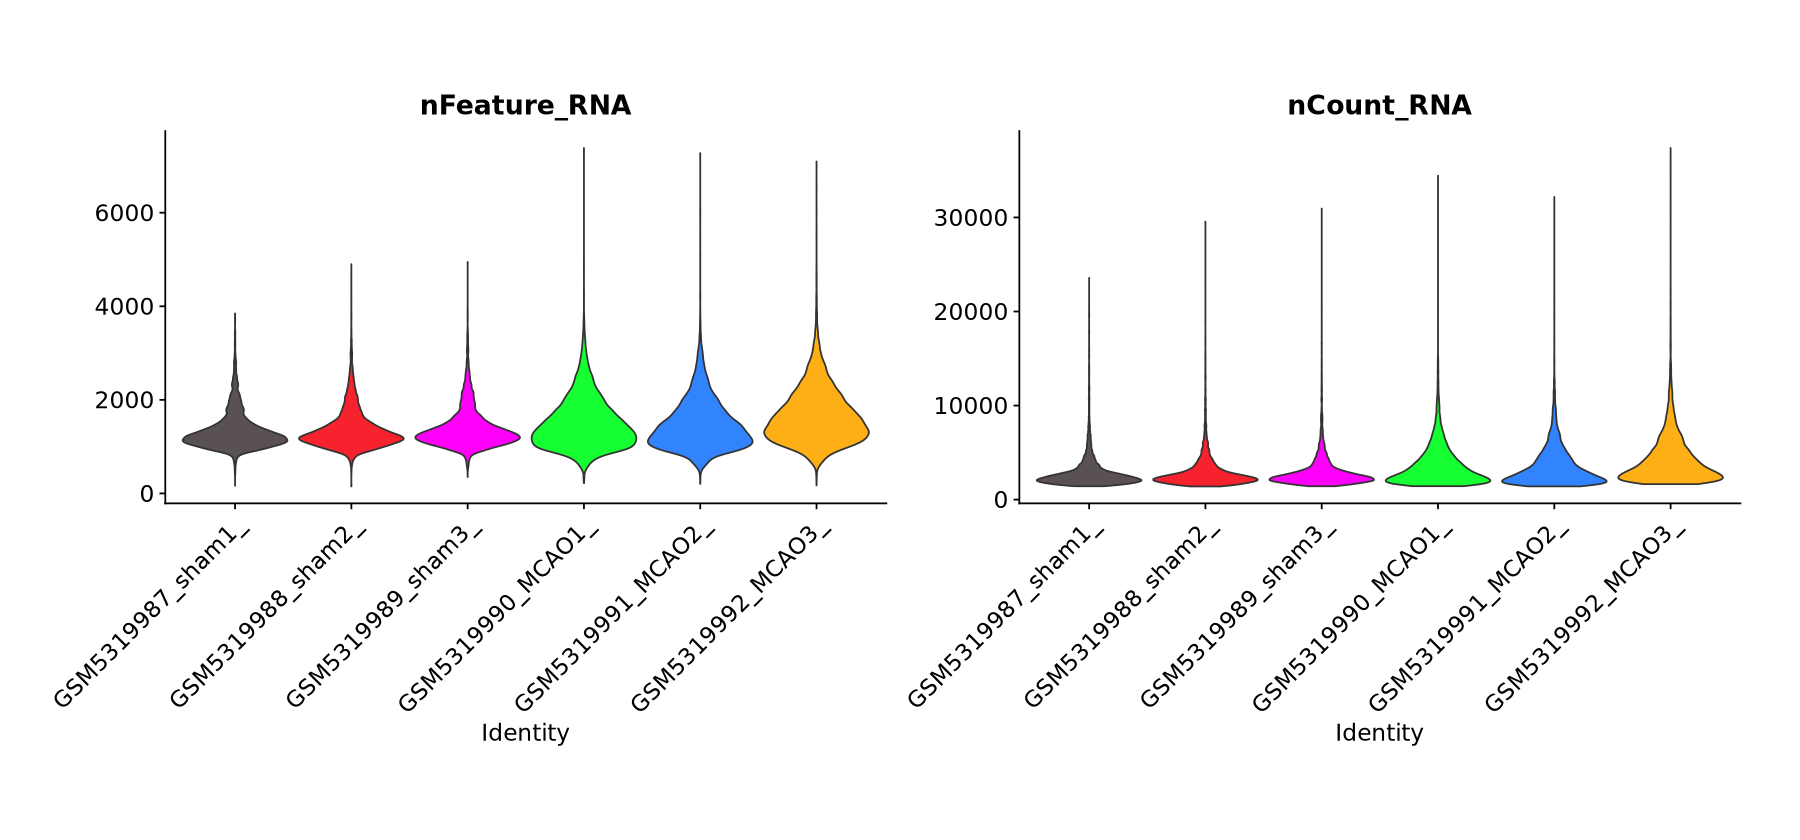

In [114]:
# view patchwork classed combined plot with adding margin to both by " & ": 

VlnPlot(zheng_et_al_seurat, 
        features = c("nFeature_RNA", "nCount_RNA"), 
        ncol = 3, 
        pt.size = 0, 
        cols = my_colours, 
        group.by = 'sample') & 
        theme(plot.margin = unit(c(1, -14, 1, 1), "cm")) &
        my_theme

Warning message:
"Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead."


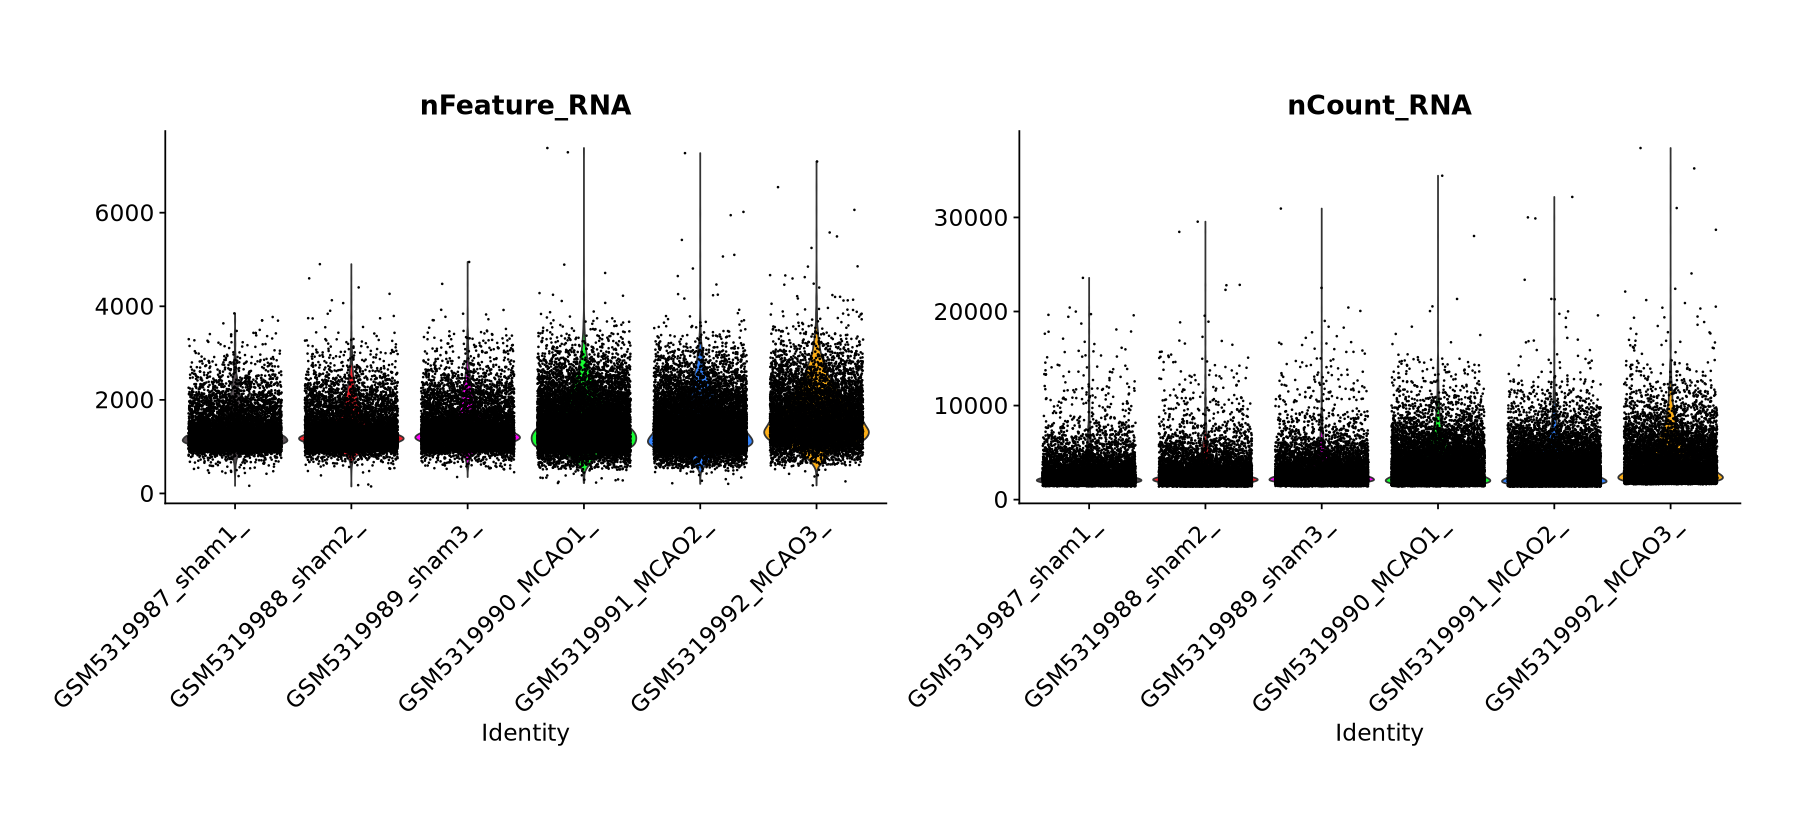

In [116]:
# view patchwork classed combined plot with adding margin to both by " & ": 

VlnPlot(zheng_et_al_seurat, 
        features = c("nFeature_RNA", "nCount_RNA"), 
        ncol = 3, 
        pt.size = 0.1, 
        cols = my_colours, 
        group.by = 'sample') & 
        theme(plot.margin = unit(c(1, -14, 1, 1), "cm")) &
        my_theme

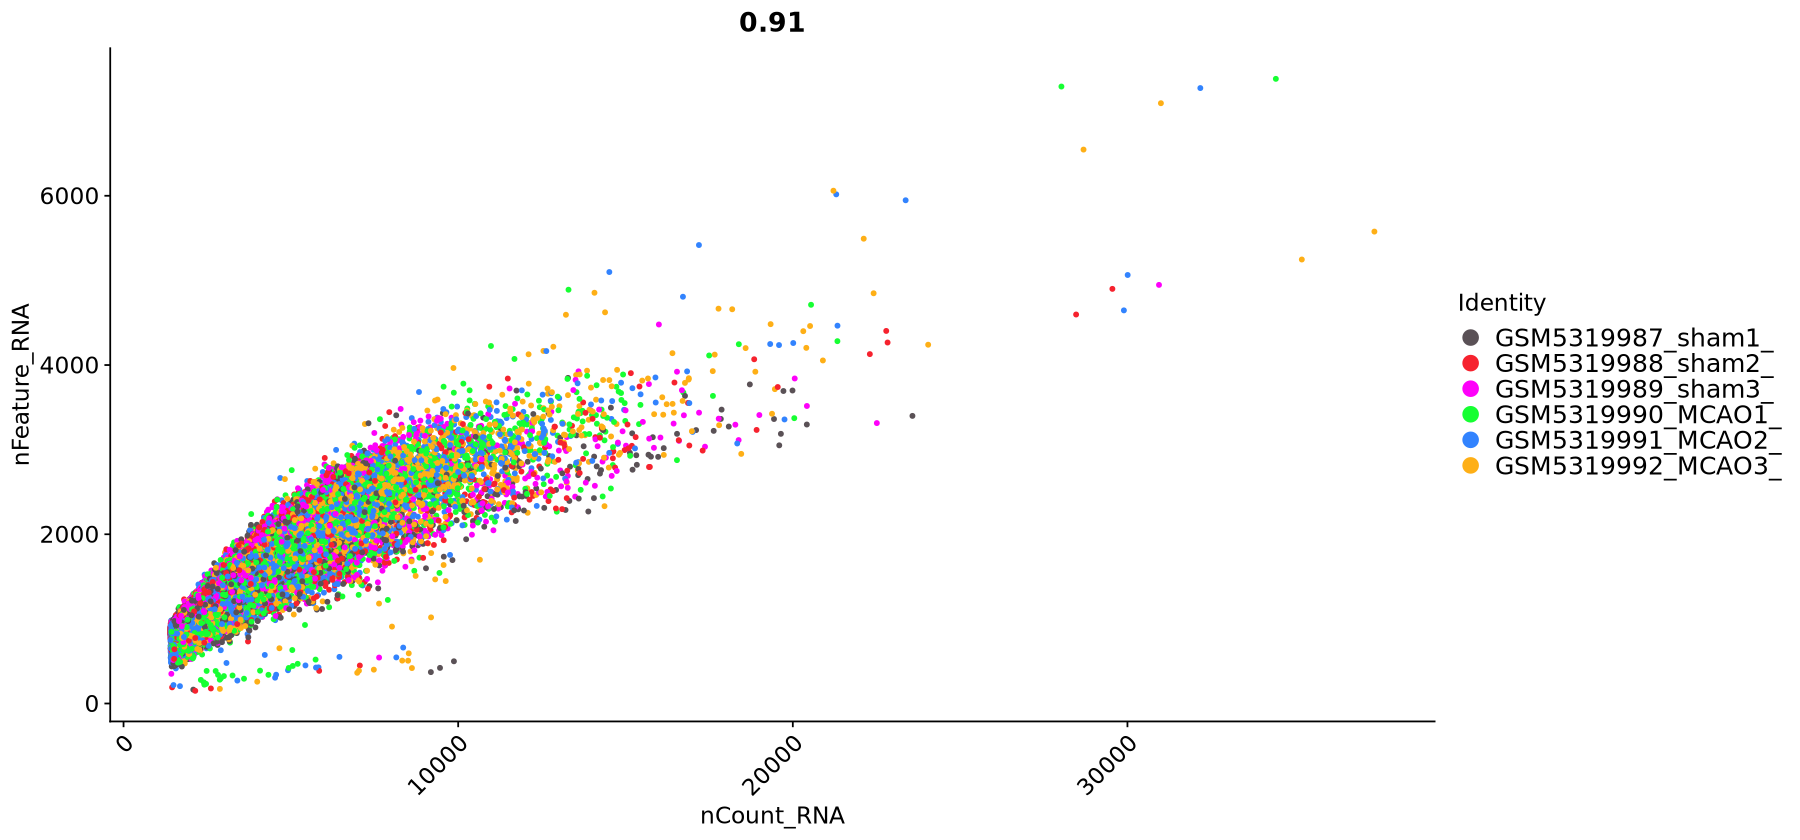

In [126]:
FeatureScatter(zheng_et_al_seurat, 
               shuffle = TRUE,
               feature1 = "nCount_RNA", 
               feature2 = "nFeature_RNA", 
               cols = my_colours, 
               group.by = 'sample') + 
               my_theme +
               guides(colour = guide_legend(override.aes = list(size=4))) # size of legend circles:

In [128]:
# Check if the RNA assay has gene info:

In [129]:
zheng_et_al_seurat@assays$RNA@meta.data |> head()

1
2
3
4
5
6

In [130]:
zheng_et_al_seurat@assays$RNA@meta.data |> dim()

[1] 19707     0

In [132]:
rownames(zheng_et_al_seurat@assays$RNA@meta.data) <- zheng_et_al_seurat |> rownames()

In [133]:
zheng_et_al_seurat@assays$RNA@meta.data |> head()

Xkr4   
Gm1992 
Rp1    
Sox17  
Gm37323
Mrpl15

In [134]:
# view mitocohondrial genes as in mouse:

zheng_et_al_seurat |>  
rownames() |> 
stringr::str_detect(pattern = "^mt[-\\.]") |> 
table()


FALSE  TRUE 
19694    13 

In [135]:
zheng_et_al_seurat |>  
rownames() |> 
stringr::str_subset(pattern = "^mt[-\\.]")

[1] "mt-Nd1"  "mt-Nd2"  "mt-Co1"  "mt-Co2"  "mt-Atp8" "mt-Atp6" "mt-Co3" 
 [8] "mt-Nd3"  "mt-Nd4l" "mt-Nd4"  "mt-Nd5"  "mt-Nd6"  "mt-Cytb"

In [136]:
# ribosomal mouse genes:

zheng_et_al_seurat |>  
rownames() |> 
stringr::str_detect(pattern = "^Rpl") |> 
table()


FALSE  TRUE 
19644    63 

In [138]:
zheng_et_al_seurat |>  
rownames() |> 
stringr::str_subset(pattern = "^Rpl")

[1] "Rpl7"       "Rpl31"      "Rpl37a"     "Rpl7a"      "Rpl12"     
 [6] "Rpl35"      "Rpl39"      "Rpl10"      "Rpl36a"     "Rpl22l1"   
[11] "Rpl34"      "Rpl11"      "Rpl22"      "Rpl9"       "Rpl5"      
[16] "Rplp0"      "Rpl6"       "Rpl21"      "Rpl32"      "Rpl28"     
[21] "Rpl13a"     "Rpl18"      "Rpl27a"     "Rplp2"      "Rpl6l"     
[26] "Rpl41"      "Rpl18a"     "Rpl13"      "Rpl21-ps4"  "Rpl15"     
[31] "Rpl23a-ps3" "Rpl13-ps3"  "Rpl10-ps3"  "Rplp1"      "Rpl4"      
[36] "Rpl29"      "Rpl14"      "Rpl26"      "Rpl23a"     "Rpl9-ps1"  
[41] "Rpl23"      "Rpl19"      "Rpl27"      "Rpl38"      "Rpl36-ps3" 
[46] "Rpl36al"    "Rpl37"      "Rpl30"      "Rpl7a-ps3"  "Rpl8"      
[51] "Rpl3"       "Rpl39l"     "Rpl35a"     "Rpl24"      "Rpl3l"     
[56] "Rpl10a"     "Rpl7l1"     "Rpl36"      "Rpl7a-ps5"  "Rpl27-ps3" 
[61] "Rpl17"      "Rpl9-ps6"   "Rpl13a-ps1"

In [140]:
# Genemodel annotated genes:

zheng_et_al_seurat |>  
rownames() |> 
stringr::str_subset(pattern = "^Gm[0-9]+$") |> 
length()

[1] 2175

In [148]:
# I will use ensembl database to classify gene types:

list.files(path = .libPaths()) |> stringr::str_subset('Ens')

[1] "EnsDb.Mmusculus.v79"

In [149]:
gene_annotation <- ensembldb::genes(EnsDb.Mmusculus.v79::EnsDb.Mmusculus.v79)

In [150]:
gene_annotation

GRanges object with 43629 ranges and 6 metadata columns:
                     seqnames            ranges strand |            gene_id
                        <Rle>         <IRanges>  <Rle> |        <character>
  ENSMUSG00000102693        1   3073253-3074322      + | ENSMUSG00000102693
  ENSMUSG00000064842        1   3102016-3102125      + | ENSMUSG00000064842
  ENSMUSG00000051951        1   3205901-3671498      - | ENSMUSG00000051951
  ENSMUSG00000102851        1   3252757-3253236      + | ENSMUSG00000102851
  ENSMUSG00000103377        1   3365731-3368549      - | ENSMUSG00000103377
                 ...      ...               ...    ... .                ...
  ENSMUSG00000095134        Y 90753057-90763485      + | ENSMUSG00000095134
  ENSMUSG00000095366        Y 90754513-90754821      - | ENSMUSG00000095366
  ENSMUSG00000096768        Y 90784738-90816464      + | ENSMUSG00000096768
  ENSMUSG00000099871        Y 90837413-90844040      + | ENSMUSG00000099871
  ENSMUSG00000096850        Y 9

In [152]:
gene_annotation[gene_annotation$gene_name %in% rownames(zheng_et_al_seurat)]

GRanges object with 18958 ranges and 6 metadata columns:
                     seqnames            ranges strand |            gene_id
                        <Rle>         <IRanges>  <Rle> |        <character>
  ENSMUSG00000051951        1   3205901-3671498      - | ENSMUSG00000051951
  ENSMUSG00000089699        1   3466587-3513553      + | ENSMUSG00000089699
  ENSMUSG00000025900        1   4290846-4409241      - | ENSMUSG00000025900
  ENSMUSG00000025902        1   4490931-4497354      - | ENSMUSG00000025902
  ENSMUSG00000033845        1   4773206-4785739      - | ENSMUSG00000033845
                 ...      ...               ...    ... .                ...
  ENSMUSG00000101243        Y   6583546-6615511      + | ENSMUSG00000101243
  ENSMUSG00000100231        Y 12273932-12306702      + | ENSMUSG00000100231
  ENSMUSG00000100892        Y 38476061-38502238      - | ENSMUSG00000100892
  ENSMUSG00000096769        Y 51125220-51151484      + | ENSMUSG00000096769
  ENSMUSG00000096768        Y 9

In [162]:
gene_annotation_DF <- gene_annotation@elementMetadata |> as.data.frame()

In [168]:
gene_annotation_DF |> head()

gene_id            gene_name     gene_biotype         seq_coord_system
1 ENSMUSG00000102693 RP23-271O17.1 TEC                  chromosome      
2 ENSMUSG00000064842 Gm26206       snRNA                chromosome      
3 ENSMUSG00000051951 Xkr4          protein_coding       chromosome      
4 ENSMUSG00000102851 RP23-317L18.1 processed_pseudogene chromosome      
5 ENSMUSG00000103377 RP23-317L18.4 TEC                  chromosome      
6 ENSMUSG00000104017 RP23-317L18.3 TEC                  chromosome      
  symbol        entrezid
1 RP23-271O17.1     NA  
2 Gm26206           NA  
3 Xkr4          497097  
4 RP23-317L18.1     NA  
5 RP23-317L18.4     NA  
6 RP23-317L18.3     NA

In [178]:
zheng_et_al_seurat@assays$RNA@meta.data |> head()

Xkr4   
Gm1992 
Rp1    
Sox17  
Gm37323
Mrpl15

In [172]:
zheng_et_al_seurat@assays$RNA@meta.data$gene_name <- NULL

In [179]:
library(dplyr)

# Convert Seurat meta.data to tibble
meta_data <- zheng_et_al_seurat@assays$RNA@meta.data |> 
    tibble::rownames_to_column("gene_identities") 

In [180]:
meta_data |> head()

gene_identities
1 Xkr4           
2 Gm1992         
3 Rp1            
4 Sox17          
5 Gm37323        
6 Mrpl15

In [181]:
meta_data_modified <- 
    meta_data |> 
    left_join(gene_annotation_DF, by = c("gene_identities" = "gene_name"))

In [182]:
meta_data_modified |> head()

gene_identities gene_id            gene_biotype   seq_coord_system symbol
1 Xkr4            ENSMUSG00000051951 protein_coding chromosome       Xkr4  
2 Gm1992          ENSMUSG00000089699 antisense      chromosome       Gm1992
3 Rp1             ENSMUSG00000025900 protein_coding chromosome       Rp1   
4 Sox17           ENSMUSG00000025902 protein_coding chromosome       Sox17 
5 Gm37323         NA                 NA             NA               NA    
6 Mrpl15          ENSMUSG00000033845 protein_coding chromosome       Mrpl15
  entrezid
1 497097  
2     NA  
3  19888  
4  20671  
5         
6  27395

In [183]:
meta_data_modified |> dim()

[1] 19794     6

In [185]:
zheng_et_al_seurat@assays$RNA@meta.data |> dim()

[1] 19707     0

In [216]:
meta_data_modified |> tail(n = 10)

gene_identities gene_id            gene_biotype   seq_coord_system
19785 CR974586.3      ENSMUSG00000095755 protein_coding scaffold        
19786 CR974586.5      ENSMUSG00000096646 protein_coding scaffold        
19787 Csprs           ENSMUSG00000062783 protein_coding scaffold        
19788 AC132444.6      ENSMUSG00000096808 protein_coding scaffold        
19789 AC125149.3      ENSMUSG00000094799 protein_coding scaffold        
19790 AC168977.2      ENSMUSG00000094915 protein_coding scaffold        
19791 AC168977.1      ENSMUSG00000079808 protein_coding scaffold        
19792 PISD            NA                 NA             NA              
19793 DHRSX           NA                 NA             NA              
19794 CAAA01147332.1  NA                 NA             NA              
      symbol     entrezid    
19785 CR974586.3    102639585
19786 CR974586.5    102636914
19787 Csprs      114564, ....
19788 AC132444.6           NA
19789 AC125149.3           NA
19790 AC168977.2 671917, ....
19791 AC168977.1    102638047
19792 NA                     
19793 NA                     
19794 NA

In [217]:
meta_data_modified$gene_biotype |> table()


          3prime_overlapping_ncrna                                TEC 
                                 1                                  1 
                         antisense                            lincRNA 
                               961                               1048 
                             miRNA                           misc_RNA 
                                 1                                  3 
            polymorphic_pseudogene               processed_pseudogene 
                                 2                                  9 
              processed_transcript                     protein_coding 
                                77                              16848 
                        pseudogene transcribed_unprocessed_pseudogene 
                                 5                                  2 

In [222]:
(meta_data_modified$symbol == 'mt-Co2') |> table()


FALSE  TRUE 
18957     1 

In [223]:
meta_data_modified |> filter(gene_identities %in% 'mt-Co2')

gene_identities gene_id            gene_biotype   seq_coord_system symbol
1 mt-Co2          ENSMUSG00000064354 protein_coding chromosome       mt-Co2
  entrezid
1 17709

In [224]:
gene_annotation$gene_biotype |> table()


          3prime_overlapping_ncrna                          IG_C_gene 
                                 2                                 13 
                   IG_C_pseudogene                          IG_D_gene 
                                 1                                 21 
                   IG_D_pseudogene                          IG_J_gene 
                                 4                                 74 
                        IG_LV_gene                          IG_V_gene 
                               196                                 91 
                   IG_V_pseudogene                            Mt_rRNA 
                                69                                  2 
                           Mt_tRNA                                TEC 
                                22                               1190 
                         TR_C_gene                          TR_D_gene 
                                 2                                  2 
     

In [225]:
GenomicRanges::seqnames(gene_annotation) |> table()


                        1                        10                        11 
                     3415                      1613                      2974 
                       12                        13                        14 
                     1483                      1491                      1739 
                       15                        16                        17 
                     1249                      1155                      1701 
                       18                        19                         2 
                      886                      1030                      3748 
                        3                         4                         5 
                     2192                      2878                      2059 
                        6                         7                         8 
                     2134                      3461                      1768 
                        9           CHR_MG132_PATCH

In [226]:
gene_annotation[GenomicRanges::seqnames(gene_annotation) == "MT"]

GRanges object with 37 ranges and 6 metadata columns:
                     seqnames      ranges strand |            gene_id
                        <Rle>   <IRanges>  <Rle> |        <character>
  ENSMUSG00000064336       MT        1-68      + | ENSMUSG00000064336
  ENSMUSG00000064337       MT     70-1024      + | ENSMUSG00000064337
  ENSMUSG00000064338       MT   1025-1093      + | ENSMUSG00000064338
  ENSMUSG00000064339       MT   1094-2675      + | ENSMUSG00000064339
  ENSMUSG00000064340       MT   2676-2750      + | ENSMUSG00000064340
                 ...      ...         ...    ... .                ...
  ENSMUSG00000064368       MT 13552-14070      - | ENSMUSG00000064368
  ENSMUSG00000064369       MT 14071-14139      - | ENSMUSG00000064369
  ENSMUSG00000064370       MT 14145-15288      + | ENSMUSG00000064370
  ENSMUSG00000064371       MT 15289-15355      + | ENSMUSG00000064371
  ENSMUSG00000064372       MT 15356-15422      - | ENSMUSG00000064372
                       gene_name   g

In [227]:
gene_annotation[GenomicRanges::seqnames(gene_annotation) == "MT"]$gene_biotype |> table()


       Mt_rRNA        Mt_tRNA protein_coding 
             2             22             13 

In [229]:
gene_annotation |> length()

[1] 43629

In [230]:
# so there are actually 13 mitochondrial protein coding genes.

In [235]:
gene_annotation[GenomicRanges::seqnames(gene_annotation) == "MT"]$gene_biotype

[1] "Mt_tRNA"        "Mt_rRNA"        "Mt_tRNA"        "Mt_rRNA"       
 [5] "Mt_tRNA"        "protein_coding" "Mt_tRNA"        "Mt_tRNA"       
 [9] "Mt_tRNA"        "protein_coding" "Mt_tRNA"        "Mt_tRNA"       
[13] "Mt_tRNA"        "Mt_tRNA"        "Mt_tRNA"        "protein_coding"
[17] "Mt_tRNA"        "Mt_tRNA"        "protein_coding" "Mt_tRNA"       
[21] "protein_coding" "protein_coding" "protein_coding" "Mt_tRNA"       
[25] "protein_coding" "Mt_tRNA"        "protein_coding" "protein_coding"
[29] "Mt_tRNA"        "Mt_tRNA"        "Mt_tRNA"        "protein_coding"
[33] "protein_coding" "Mt_tRNA"        "protein_coding" "Mt_tRNA"       
[37] "Mt_tRNA"

In [252]:
gene_annotation[GenomicRanges::seqnames(gene_annotation) == "MT" & gene_annotation$gene_biotype == 'protein_coding']

GRanges object with 13 ranges and 6 metadata columns:
                     seqnames      ranges strand |            gene_id
                        <Rle>   <IRanges>  <Rle> |        <character>
  ENSMUSG00000064341       MT   2751-3707      + | ENSMUSG00000064341
  ENSMUSG00000064345       MT   3914-4951      + | ENSMUSG00000064345
  ENSMUSG00000064351       MT   5328-6872      + | ENSMUSG00000064351
  ENSMUSG00000064354       MT   7013-7696      + | ENSMUSG00000064354
  ENSMUSG00000064356       MT   7766-7969      + | ENSMUSG00000064356
                 ...      ...         ...    ... .                ...
  ENSMUSG00000065947       MT  9877-10173      + | ENSMUSG00000065947
  ENSMUSG00000064363       MT 10167-11544      + | ENSMUSG00000064363
  ENSMUSG00000064367       MT 11742-13565      + | ENSMUSG00000064367
  ENSMUSG00000064368       MT 13552-14070      - | ENSMUSG00000064368
  ENSMUSG00000064370       MT 14145-15288      + | ENSMUSG00000064370
                       gene_name   g

In [253]:
zheng_et_al_seurat |>  
rownames() |> 
stringr::str_subset(pattern = "^mt[-\\.]")

[1] "mt-Nd1"  "mt-Nd2"  "mt-Co1"  "mt-Co2"  "mt-Atp8" "mt-Atp6" "mt-Co3" 
 [8] "mt-Nd3"  "mt-Nd4l" "mt-Nd4"  "mt-Nd5"  "mt-Nd6"  "mt-Cytb"

In [254]:
gene_annotation[GenomicRanges::seqnames(gene_annotation) == "MT" & gene_annotation$gene_biotype == 'protein_coding']$gene_name

[1] "mt-Nd1"  "mt-Nd2"  "mt-Co1"  "mt-Co2"  "mt-Atp8" "mt-Atp6" "mt-Co3" 
 [8] "mt-Nd3"  "mt-Nd4l" "mt-Nd4"  "mt-Nd5"  "mt-Nd6"  "mt-Cytb"

In [255]:
zheng_et_al_seurat@meta.data |> head() |> print()

                                        orig.ident nCount_RNA nFeature_RNA
AAACCTGAGCGAAGGG-1-GSM5319988_sham2_ SeuratProject       1438          933
AAACCTGAGCTAACAA-1-GSM5319988_sham2_ SeuratProject       1603          983
AAACCTGAGGCTAGCA-1-GSM5319988_sham2_ SeuratProject       2384         1298
AAACCTGAGGTGCACA-1-GSM5319988_sham2_ SeuratProject       2906         1309
AAACCTGAGTTTAGGA-1-GSM5319988_sham2_ SeuratProject       2928         1164
AAACCTGCAACACGCC-1-GSM5319988_sham2_ SeuratProject       2153         1175
                                                                   _index
AAACCTGAGCGAAGGG-1-GSM5319988_sham2_ AAACCTGAGCGAAGGG-1-GSM5319988_sham2_
AAACCTGAGCTAACAA-1-GSM5319988_sham2_ AAACCTGAGCTAACAA-1-GSM5319988_sham2_
AAACCTGAGGCTAGCA-1-GSM5319988_sham2_ AAACCTGAGGCTAGCA-1-GSM5319988_sham2_
AAACCTGAGGTGCACA-1-GSM5319988_sham2_ AAACCTGAGGTGCACA-1-GSM5319988_sham2_
AAACCTGAGTTTAGGA-1-GSM5319988_sham2_ AAACCTGAGTTTAGGA-1-GSM5319988_sham2_
AAACCTGCAACACGCC-1-GSM5319988_s

In [256]:
zheng_et_al_seurat@meta.data$total_counts_mt |> summary()

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
      0       0       0       0       0       0 

In [258]:
zheng_et_al_seurat@meta.data |> ncol()

[1] 28

In [262]:
my_seurat_extend_scCustomize_lib  <- 
    "/fast/AG_Bunina/Yusuf/Project_Endothelial_and_Stroke/renv_envs/seuratExtend_scCustomize/renv/library/linux-rhel-9.4/R-4.4/x86_64-unknown-linux-gnu"

In [263]:
.libPaths(new =  my_seurat_extend_scCustomize_lib, include.site = FALSE)

In [266]:
test_seurat <- zheng_et_al_seurat

In [268]:
test_seurat <- 
    scCustomize::Add_Cell_QC_Metrics(object = test_seurat, species = 'Mouse')

* Adding Mito/Ribo Percentages to meta.data.
Adding Percent Mitochondrial genes for Mouse using gene symbol pattern: "^mt-".
Adding Percent Ribosomal genes for Mouse using gene symbol pattern: "^Rp[sl]".
Adding Percent Mito+Ribo by adding Mito & Ribo percentages.
* Adding Cell Complexity #1 (log10GenesPerUMI) to meta.data.
* Adding Cell Complexity #2 (Top 50 Percentages) to meta.data.
Calculating percent expressing top 50 for layer: counts
* Adding MSigDB Oxidative Phosphorylation, Apoptosis, and DNA Repair
  Percentages to meta.data.
Warning message:
"The following features were omitted as they were not found:
i Atp5pb and Ndufb1"
Warning message:
"The following features were omitted as they were not found:
i Bcl2l10 and Ccna1"
Warning message:
"The following features were omitted as they were not found:
i Eloa, Gsdme, Polr1h, and Vps28"
* Adding IEG Percentages to meta.data.
Warning message:
"The following features were omitted as they were not found:
i Ccn1, Ccn2, Flg, Cebpd, Acod1,

In [270]:
test_seurat@meta.data |> ncol()

[1] 38

In [273]:
test_seurat@meta.data[, 29:38] |> head()

percent_mito percent_ribo
AAACCTGAGCGAAGGG-1-GSM5319988_sham2_ 2.016690     10.778860   
AAACCTGAGCTAACAA-1-GSM5319988_sham2_ 1.247661      9.295072   
AAACCTGAGGCTAGCA-1-GSM5319988_sham2_ 3.062081      7.046980   
AAACCTGAGGTGCACA-1-GSM5319988_sham2_ 1.135582     18.754301   
AAACCTGAGTTTAGGA-1-GSM5319988_sham2_ 2.015027     20.833333   
AAACCTGCAACACGCC-1-GSM5319988_sham2_ 2.647469     10.682768   
                                     percent_mito_ribo log10GenesPerUMI
AAACCTGAGCGAAGGG-1-GSM5319988_sham2_ 12.79555          0.9405030       
AAACCTGAGCTAACAA-1-GSM5319988_sham2_ 10.54273          0.9337334       
AAACCTGAGGCTAGCA-1-GSM5319988_sham2_ 10.10906          0.9218218       
AAACCTGAGGTGCACA-1-GSM5319988_sham2_ 19.88988          0.8999924       
AAACCTGAGTTTAGGA-1-GSM5319988_sham2_ 22.84836          0.8844339       
AAACCTGCAACACGCC-1-GSM5319988_sham2_ 13.33024          0.9210913       
                                     percent_top50 percent_oxphos percent_apop
AAACCTGAGCGAAGGG-1-GSM5319988_sham2_ 25.03477      4.033380       1.808067    
AAACCTGAGCTAACAA-1-GSM5319988_sham2_ 27.57330      4.741110       2.620087    
AAACCTGAGGCTAGCA-1-GSM5319988_sham2_ 27.68456      4.530201       2.348993    
AAACCTGAGGTGCACA-1-GSM5319988_sham2_ 30.17894      2.718513       2.821748    
AAACCTGAGTTTAGGA-1-GSM5319988_sham2_ 36.74863      2.937158       1.741803    
AAACCTGCAACACGCC-1-GSM5319988_sham2_ 29.95820      4.040873       2.461681    
                                     percent_dna_repair percent_ieg
AAACCTGAGCGAAGGG-1-GSM5319988_sham2_ 0.9735744          2.016690   
AAACCTGAGCTAACAA-1-GSM5319988_sham2_ 0.8733624          3.431067   
AAACCTGAGGCTAGCA-1-GSM5319988_sham2_ 1.4261745          3.984899   
AAACCTGAGGTGCACA-1-GSM5319988_sham2_ 1.0667584          2.202340   
AAACCTGAGTTTAGGA-1-GSM5319988_sham2_ 0.9221311          1.639344   
AAACCTGCAACACGCC-1-GSM5319988_sham2_ 1.0682768          1.904320   
                                     percent_hemo
AAACCTGAGCGAAGGG-1-GSM5319988_sham2_ 0.00000000  
AAACCTGAGCTAACAA-1-GSM5319988_sham2_ 0.00000000  
AAACCTGAGGCTAGCA-1-GSM5319988_sham2_ 0.04194631  
AAACCTGAGGTGCACA-1-GSM5319988_sham2_ 0.03441156  
AAACCTGAGTTTAGGA-1-GSM5319988_sham2_ 0.00000000  
AAACCTGCAACACGCC-1-GSM5319988_sham2_ 0.00000000

In [274]:
library(scCustomize)

scCustomize v3.0.1
If you find the scCustomize useful please cite.
See 'samuel-marsh.github.io/scCustomize/articles/FAQ.html' for citation info.



Warning message:
"Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead."
Warning message:
"Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead."
Warning message:
"Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead."


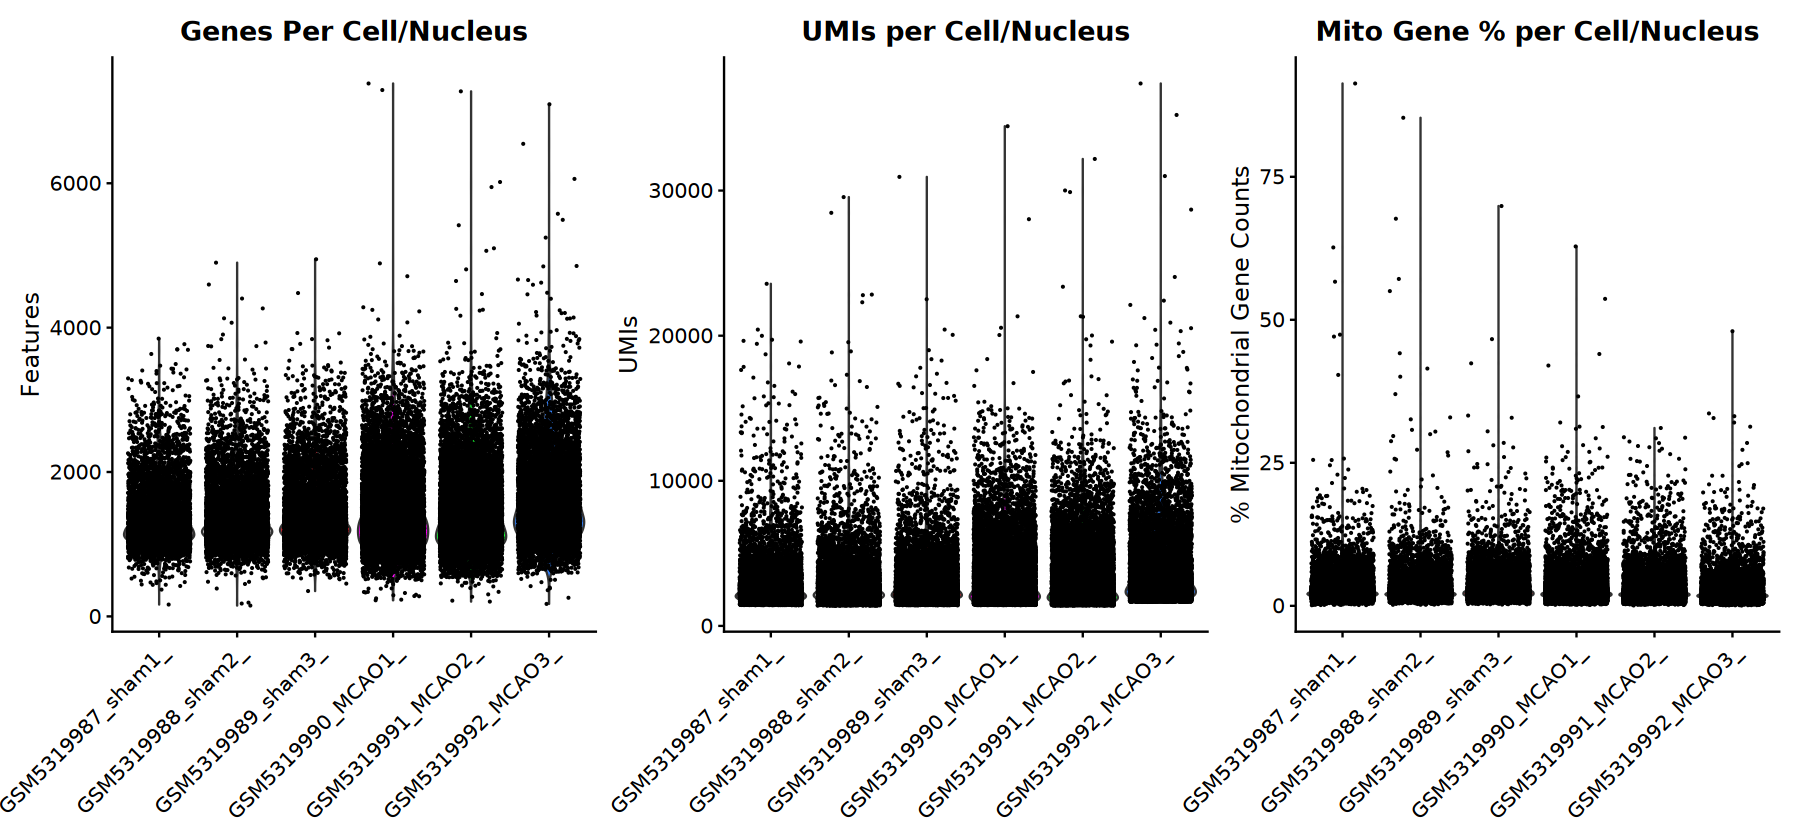

In [276]:
QC_Plots_Combined_Vln(seurat_object = test_seurat, pt.size = 0.1, group.by = 'sample')

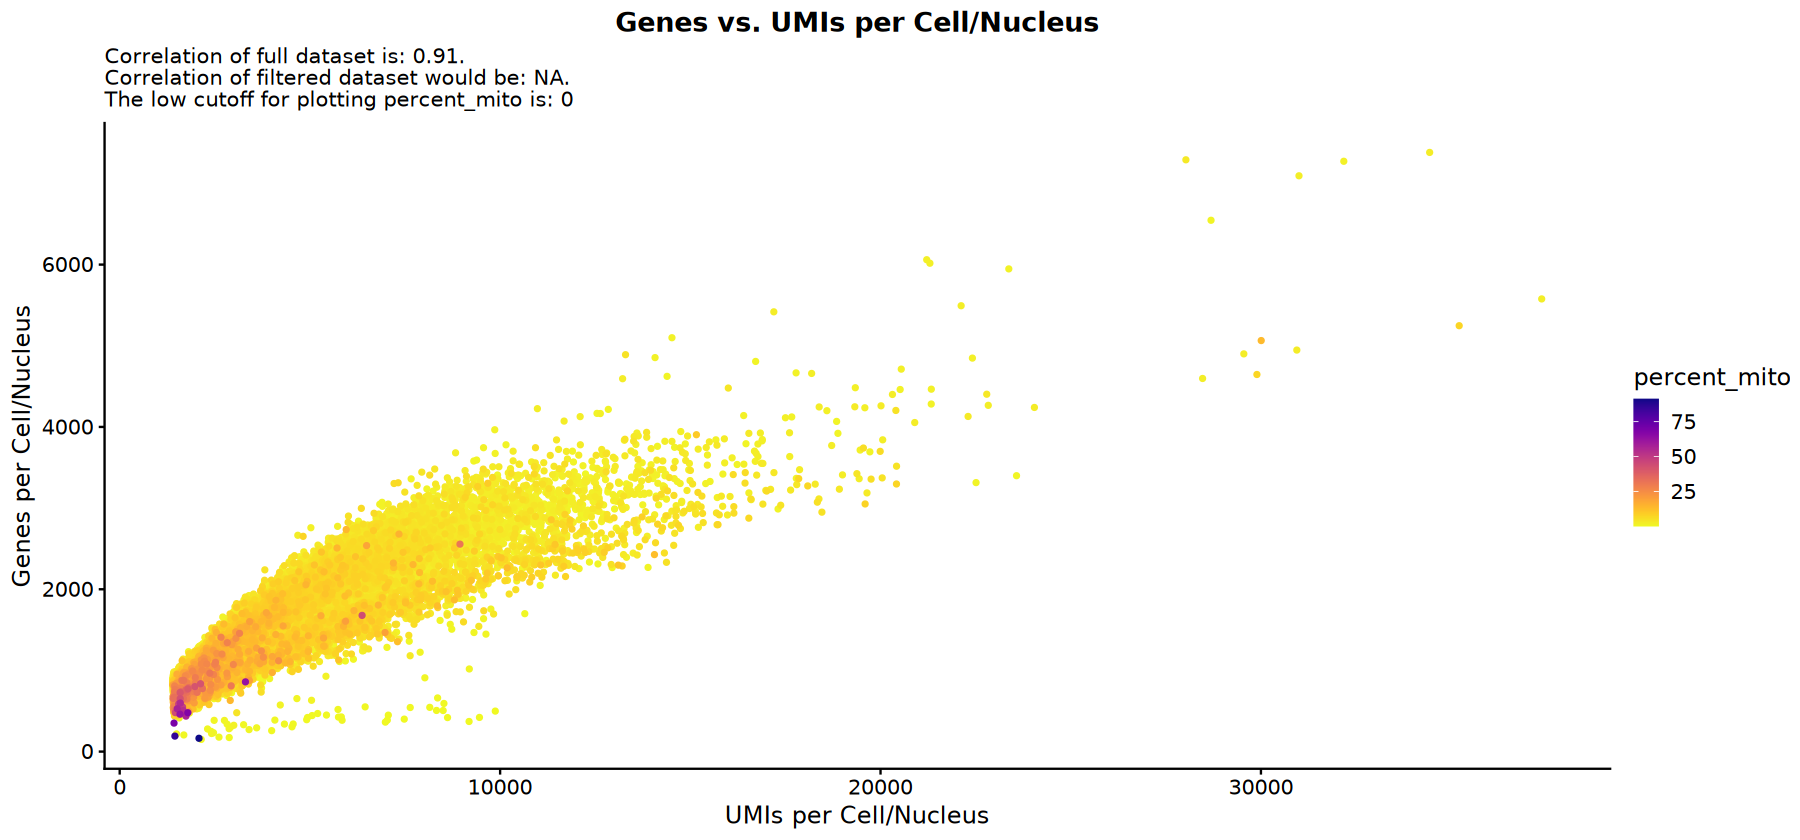

In [277]:
QC_Plot_UMIvsGene(seurat_object = test_seurat, meta_gradient_name = "percent_mito", group.by = 'sample')

In [278]:
ls()

[1] "gene_annotation"                  "gene_annotation_DF"              
 [3] "is_mt_gene"                       "meta_data"                       
 [5] "meta_data_modified"               "my_colours"                      
 [7] "my_seurat_extend_scCustomize_lib" "my_seurat_lib"                   
 [9] "my_theme"                         "p1"                              
[11] "temp_df"                          "test_seurat"                     
[13] "zheng_et_al_seurat"

In [279]:
test_seurat@meta.data[, 29:38] |> head()

percent_mito percent_ribo
AAACCTGAGCGAAGGG-1-GSM5319988_sham2_ 2.016690     10.778860   
AAACCTGAGCTAACAA-1-GSM5319988_sham2_ 1.247661      9.295072   
AAACCTGAGGCTAGCA-1-GSM5319988_sham2_ 3.062081      7.046980   
AAACCTGAGGTGCACA-1-GSM5319988_sham2_ 1.135582     18.754301   
AAACCTGAGTTTAGGA-1-GSM5319988_sham2_ 2.015027     20.833333   
AAACCTGCAACACGCC-1-GSM5319988_sham2_ 2.647469     10.682768   
                                     percent_mito_ribo log10GenesPerUMI
AAACCTGAGCGAAGGG-1-GSM5319988_sham2_ 12.79555          0.9405030       
AAACCTGAGCTAACAA-1-GSM5319988_sham2_ 10.54273          0.9337334       
AAACCTGAGGCTAGCA-1-GSM5319988_sham2_ 10.10906          0.9218218       
AAACCTGAGGTGCACA-1-GSM5319988_sham2_ 19.88988          0.8999924       
AAACCTGAGTTTAGGA-1-GSM5319988_sham2_ 22.84836          0.8844339       
AAACCTGCAACACGCC-1-GSM5319988_sham2_ 13.33024          0.9210913       
                                     percent_top50 percent_oxphos percent_apop
AAACCTGAGCGAAGGG-1-GSM5319988_sham2_ 25.03477      4.033380       1.808067    
AAACCTGAGCTAACAA-1-GSM5319988_sham2_ 27.57330      4.741110       2.620087    
AAACCTGAGGCTAGCA-1-GSM5319988_sham2_ 27.68456      4.530201       2.348993    
AAACCTGAGGTGCACA-1-GSM5319988_sham2_ 30.17894      2.718513       2.821748    
AAACCTGAGTTTAGGA-1-GSM5319988_sham2_ 36.74863      2.937158       1.741803    
AAACCTGCAACACGCC-1-GSM5319988_sham2_ 29.95820      4.040873       2.461681    
                                     percent_dna_repair percent_ieg
AAACCTGAGCGAAGGG-1-GSM5319988_sham2_ 0.9735744          2.016690   
AAACCTGAGCTAACAA-1-GSM5319988_sham2_ 0.8733624          3.431067   
AAACCTGAGGCTAGCA-1-GSM5319988_sham2_ 1.4261745          3.984899   
AAACCTGAGGTGCACA-1-GSM5319988_sham2_ 1.0667584          2.202340   
AAACCTGAGTTTAGGA-1-GSM5319988_sham2_ 0.9221311          1.639344   
AAACCTGCAACACGCC-1-GSM5319988_sham2_ 1.0682768          1.904320   
                                     percent_hemo
AAACCTGAGCGAAGGG-1-GSM5319988_sham2_ 0.00000000  
AAACCTGAGCTAACAA-1-GSM5319988_sham2_ 0.00000000  
AAACCTGAGGCTAGCA-1-GSM5319988_sham2_ 0.04194631  
AAACCTGAGGTGCACA-1-GSM5319988_sham2_ 0.03441156  
AAACCTGAGTTTAGGA-1-GSM5319988_sham2_ 0.00000000  
AAACCTGCAACACGCC-1-GSM5319988_sham2_ 0.00000000

Warning message:
"Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead."


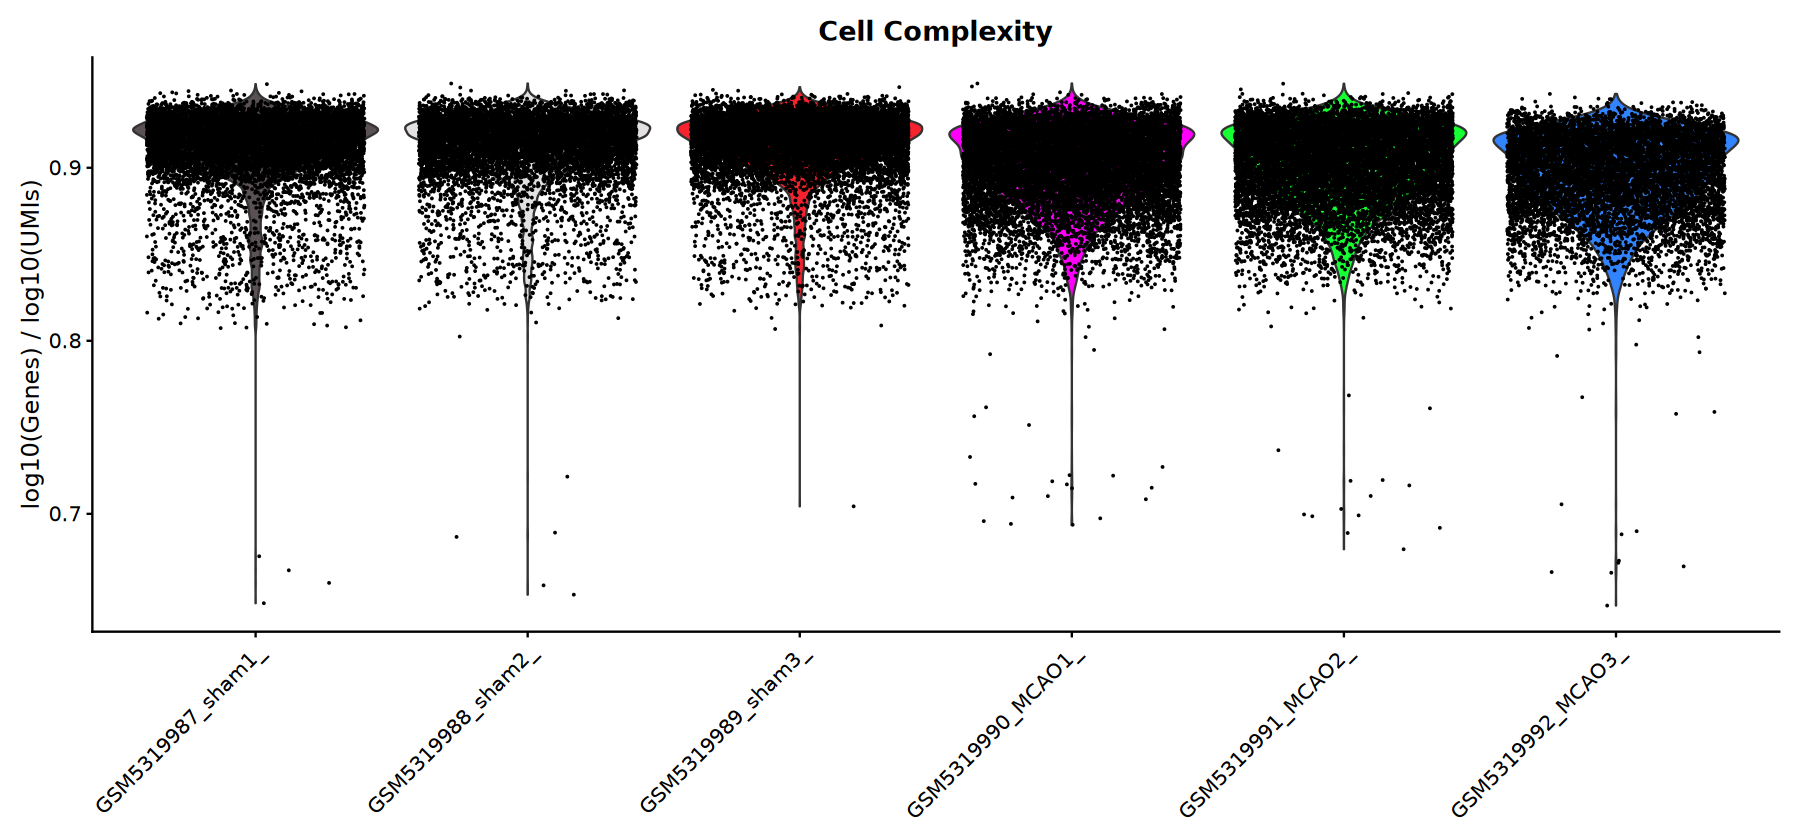

In [281]:
QC_Plots_Complexity(seurat_object = test_seurat, group.by = 'sample')

Warning message:
"Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead."


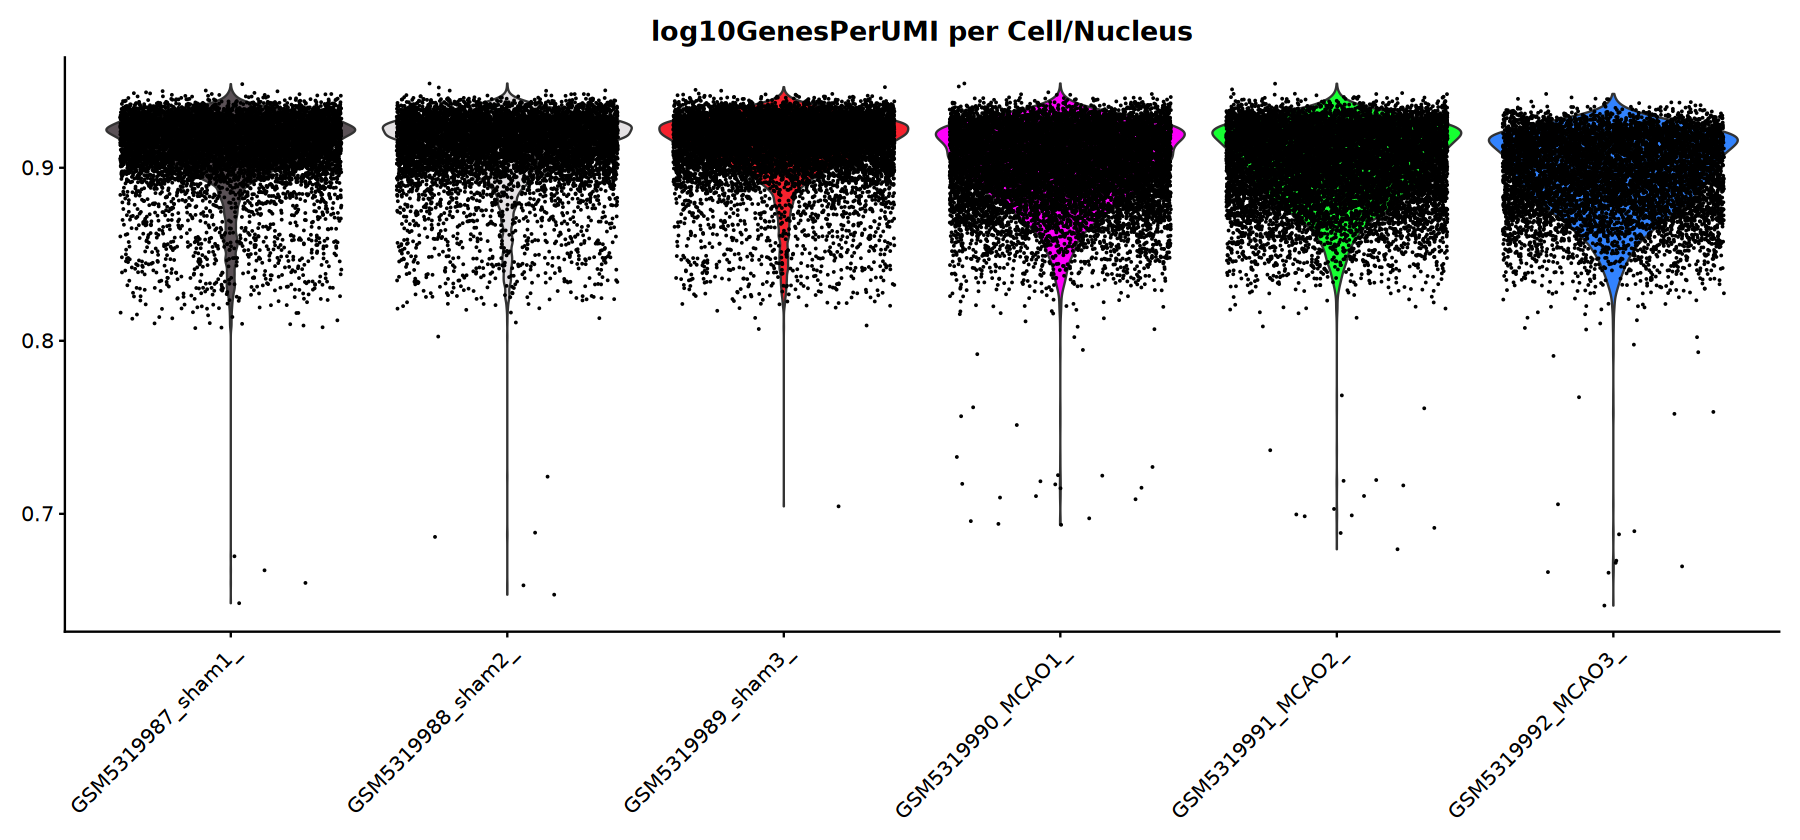

In [284]:
QC_Plots_Feature(seurat_object = test_seurat, feature = 'log10GenesPerUMI' ,group.by = 'sample')

Warning message:
"Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead."
Warning message:
"Default search for "data" layer in "RNA" assay yielded no results; utilizing "counts" layer instead."
Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


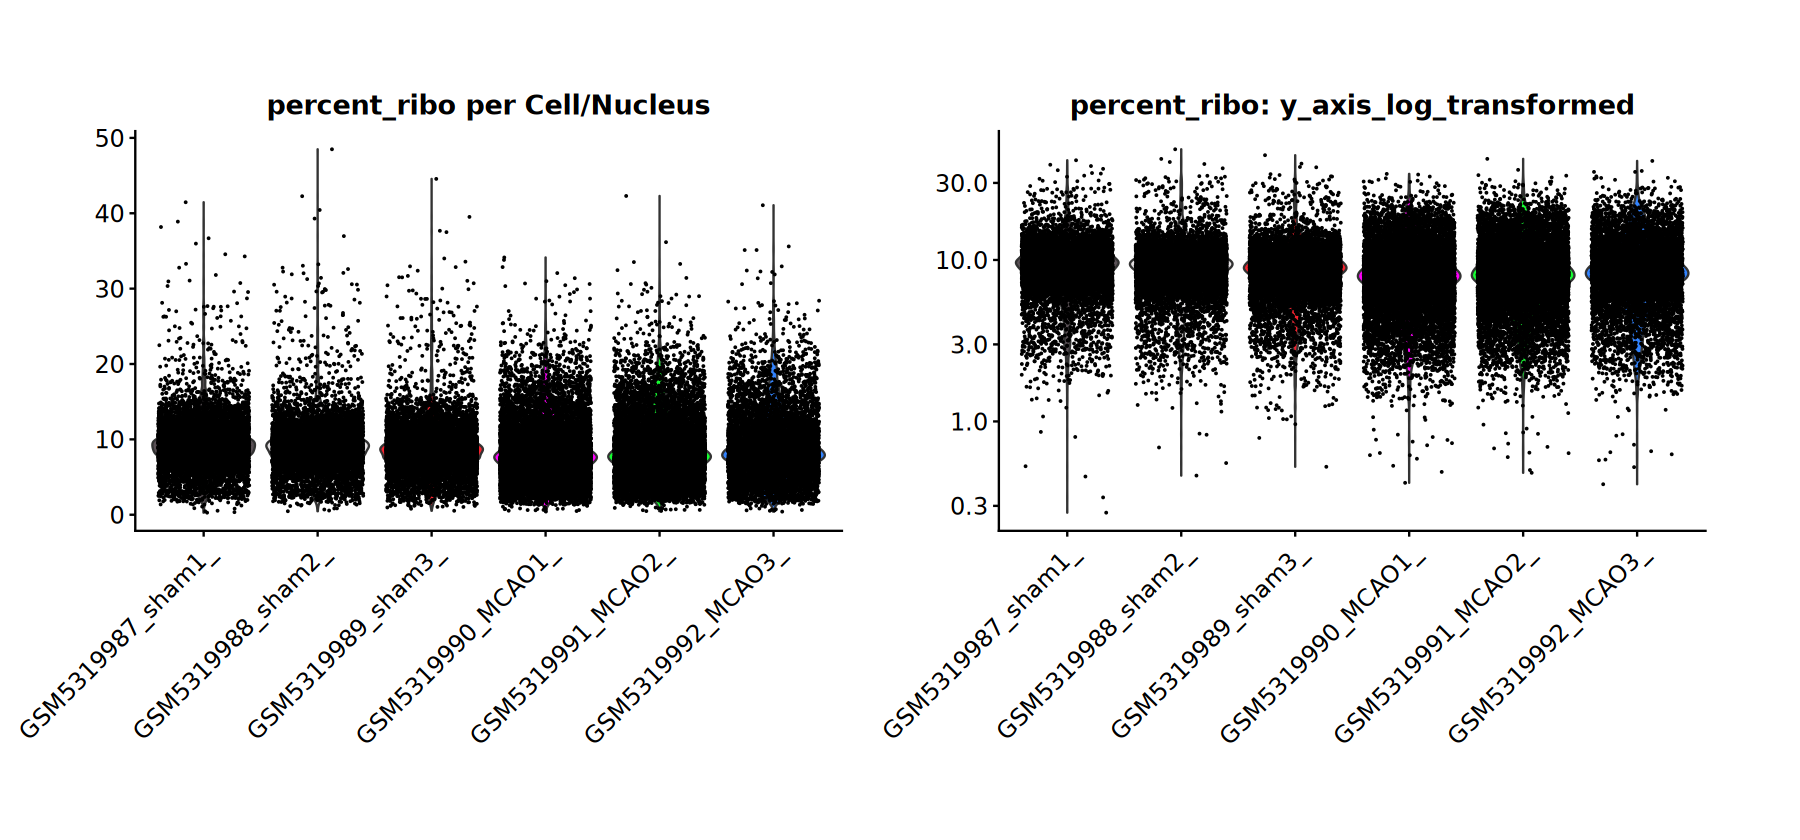

In [303]:
p1 <- QC_Plots_Feature(seurat_object = test_seurat, feature = 'percent_ribo' ,group.by = 'sample')

p2 <- QC_Plots_Feature(seurat_object = test_seurat, feature = 'percent_ribo' ,group.by = 'sample', y_axis_log = TRUE) + ggtitle(label = 'percent_ribo: y_axis_log_transformed')

patchwork::wrap_plots(p1, p2, ncol = 2) & (theme(plot.margin = unit(c(1, 1, 1, 1), "cm")) + my_theme)

In [308]:
test_seurat$sample |> table()


GSM5319987_sham1_ GSM5319988_sham2_ GSM5319989_sham3_ GSM5319990_MCAO1_ 
             8771              8540              9980             11772 
GSM5319991_MCAO2_ GSM5319992_MCAO3_ 
            11361              8104 

In [309]:
test_seurat[[]] |> colnames() |> print()

 [1] "orig.ident"                  "nCount_RNA"                 
 [3] "nFeature_RNA"                "_index"                     
 [5] "sample"                      "n_genes_by_counts"          
 [7] "log1p_n_genes_by_counts"     "total_counts"               
 [9] "log1p_total_counts"          "pct_counts_in_top_50_genes" 
[11] "pct_counts_in_top_100_genes" "pct_counts_in_top_200_genes"
[13] "pct_counts_in_top_500_genes" "total_counts_mt"            
[15] "log1p_total_counts_mt"       "pct_counts_mt"              
[17] "total_counts_ribo"           "log1p_total_counts_ribo"    
[19] "pct_counts_ribo"             "total_counts_hb"            
[21] "log1p_total_counts_hb"       "pct_counts_hb"              
[23] "n_genes"                     "doublet_score"              
[25] "predicted_doublet"           "status"                     
[27] "_scvi_batch"                 "_scvi_labels"               
[29] "percent_mito"                "percent_ribo"               
[31] "percent_mito_ribo" 

In [311]:
test_seurat$status |> table()


  control treatment 
    27291     31237 

In [321]:
test_seurat@assays$RNA@meta.data |> head()

Xkr4   
Gm1992 
Rp1    
Sox17  
Gm37323
Mrpl15

In [323]:
test_seurat@assays$RNA$counts |> colSums() |> head() |> print()

AAACCTGAGCGAAGGG-1-GSM5319988_sham2_ AAACCTGAGCTAACAA-1-GSM5319988_sham2_ 
                                1438                                 1603 
AAACCTGAGGCTAGCA-1-GSM5319988_sham2_ AAACCTGAGGTGCACA-1-GSM5319988_sham2_ 
                                2384                                 2906 
AAACCTGAGTTTAGGA-1-GSM5319988_sham2_ AAACCTGCAACACGCC-1-GSM5319988_sham2_ 
                                2928                                 2153 


In [325]:
test_seurat$nCount_RNA |> head() |> print()

AAACCTGAGCGAAGGG-1-GSM5319988_sham2_ AAACCTGAGCTAACAA-1-GSM5319988_sham2_ 
                                1438                                 1603 
AAACCTGAGGCTAGCA-1-GSM5319988_sham2_ AAACCTGAGGTGCACA-1-GSM5319988_sham2_ 
                                2384                                 2906 
AAACCTGAGTTTAGGA-1-GSM5319988_sham2_ AAACCTGCAACACGCC-1-GSM5319988_sham2_ 
                                2928                                 2153 


In [326]:
library(SingleCellExperiment)

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: 'matrixStats'


The following object is masked from 'package:dplyr':

    count



Attaching package: 'MatrixGenerics'


The following objects are masked from 'package:matrixStats':

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, 

In [327]:
test_sce <- as.SingleCellExperiment(x = test_seurat)

Warning message:
"Layer 'data' is empty"
Warning message:
"Layer 'scale.data' is empty"


In [328]:
test_sce

class: SingleCellExperiment 
dim: 19707 58528 
metadata(0):
assays(1): counts
rownames(19707): Xkr4 Gm1992 ... DHRSX CAAA01147332.1
rowData names(0):
colnames(58528): AAACCTGAGCGAAGGG-1-GSM5319988_sham2_
  AAACCTGAGCTAACAA-1-GSM5319988_sham2_ ...
  TTTGTCAGTTACCGAT-1-GSM5319991_MCAO2_
  TTTGTCATCTGCGTAA-1-GSM5319991_MCAO2_
colData names(39): orig.ident nCount_RNA ... percent_hemo ident
reducedDimNames(4): XPCA_ XSCVI_ XSCVIMDE_ XUMAP_
mainExpName: RNA
altExpNames(0):

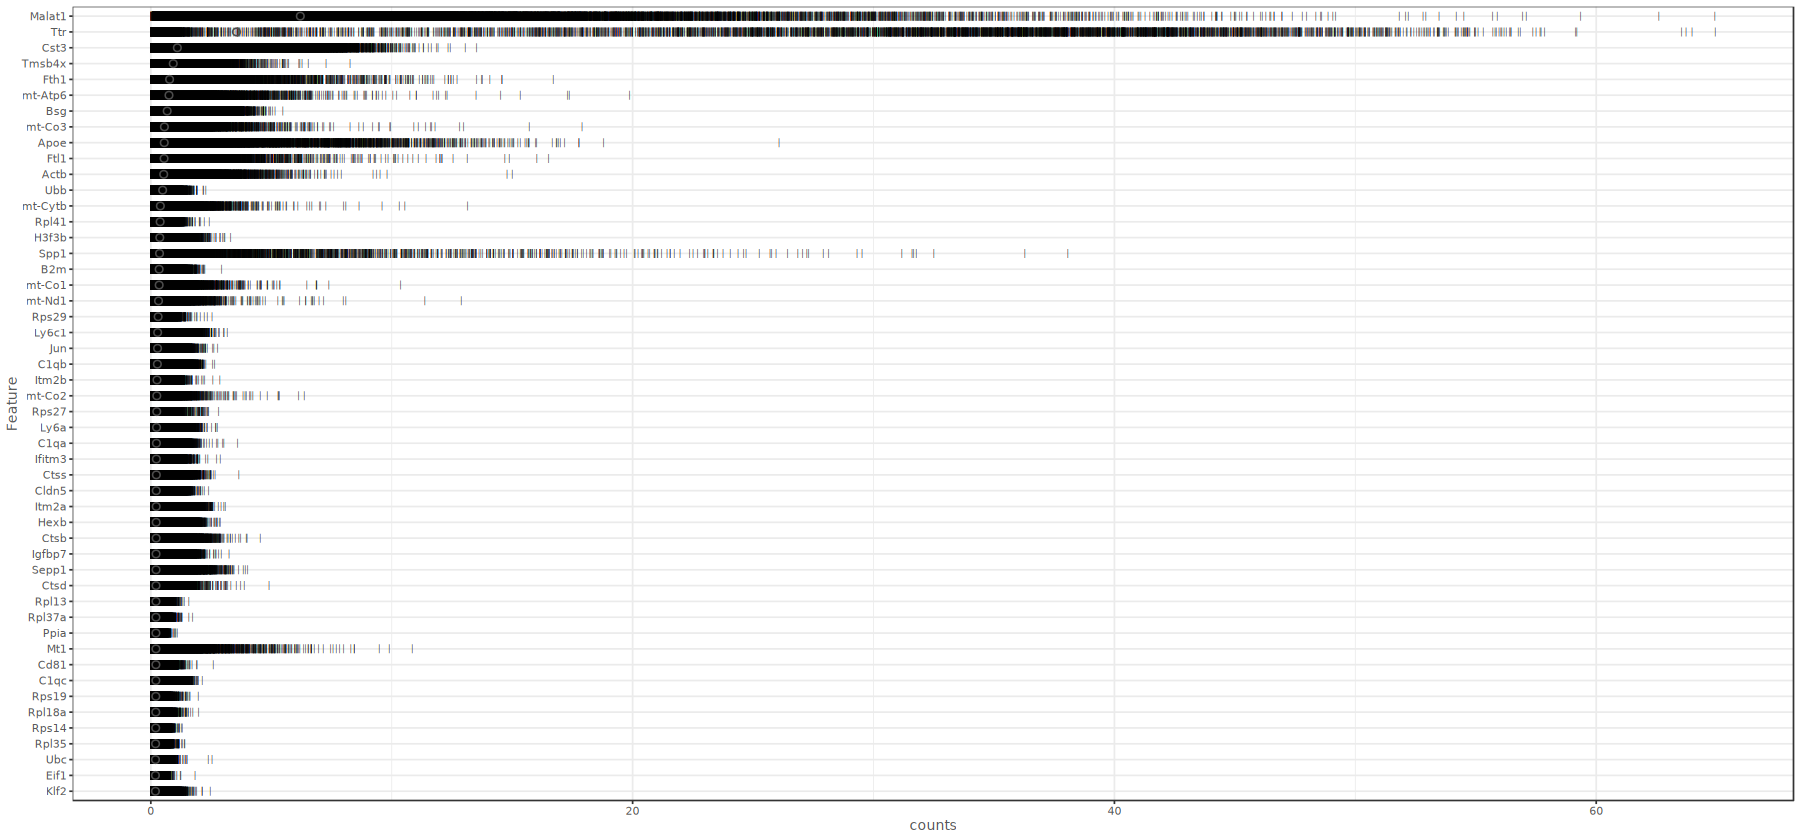

In [330]:
scater::plotHighestExprs(object = test_sce, exprs_values = 'counts')

In [334]:
test_seurat[[]] |> colnames() |> _[c(5, 29:38)] |> dput() 

c("sample", "percent_mito", "percent_ribo", "percent_mito_ribo", 
"log10GenesPerUMI", "percent_top50", "percent_oxphos", "percent_apop", 
"percent_dna_repair", "percent_ieg", "percent_hemo")


In [338]:
test_sce <- scater::logNormCounts(test_sce)

vars <- scater::getVarianceExplained(test_sce,
    variables=c("sample", "percent_mito", "percent_ribo", "percent_mito_ribo", 
"log10GenesPerUMI", "percent_top50", "percent_oxphos", "percent_apop", 
"percent_dna_repair", "percent_ieg", "percent_hemo"))

head(vars)

sample      percent_mito percent_ribo percent_mito_ribo
Xkr4    0.003060891 0.0012031986 0.0067704488 2.723964e-03     
Gm1992  0.008035333 0.0131317402 0.0066634971 1.223987e-06     
Rp1     0.029863802 0.0005909170 0.0005939734 1.464442e-03     
Sox17   2.636663415 0.9344399805 0.3981518603 3.830114e-03     
Gm37323 0.007504982 0.0002367889 0.0001242884 4.129159e-04     
Mrpl15  0.093337364 0.1460165898 0.3679395409 9.082793e-02     
        log10GenesPerUMI percent_top50 percent_oxphos percent_apop
Xkr4     0.003460281      0.001826422  9.579554e-06   0.0090159471
Gm1992   0.077478651      0.072799355  9.252122e-02   0.0339370590
Rp1      0.020502219      0.028689453  3.829970e-09   0.0044357656
Sox17   13.214610929     12.751043210  1.378530e-01   5.0798524116
Gm37323  0.004407506      0.002723359  1.515272e-04   0.0053776475
Mrpl15   0.002793064      0.482952288  1.632876e-01   0.0001119542
        percent_dna_repair percent_ieg  percent_hemo
Xkr4    5.197624e-04       0.0077042061 1.052514e-05
Gm1992  1.748975e-06       0.0274719976 2.661594e-05
Rp1     1.242906e-02       0.0013201776 9.281117e-05
Sox17   2.052856e+00       0.2518128302 2.790733e-02
Gm37323 5.103209e-06       0.0005056985 5.260949e-06
Mrpl15  2.711521e-01       0.0001021866 1.383870e-02

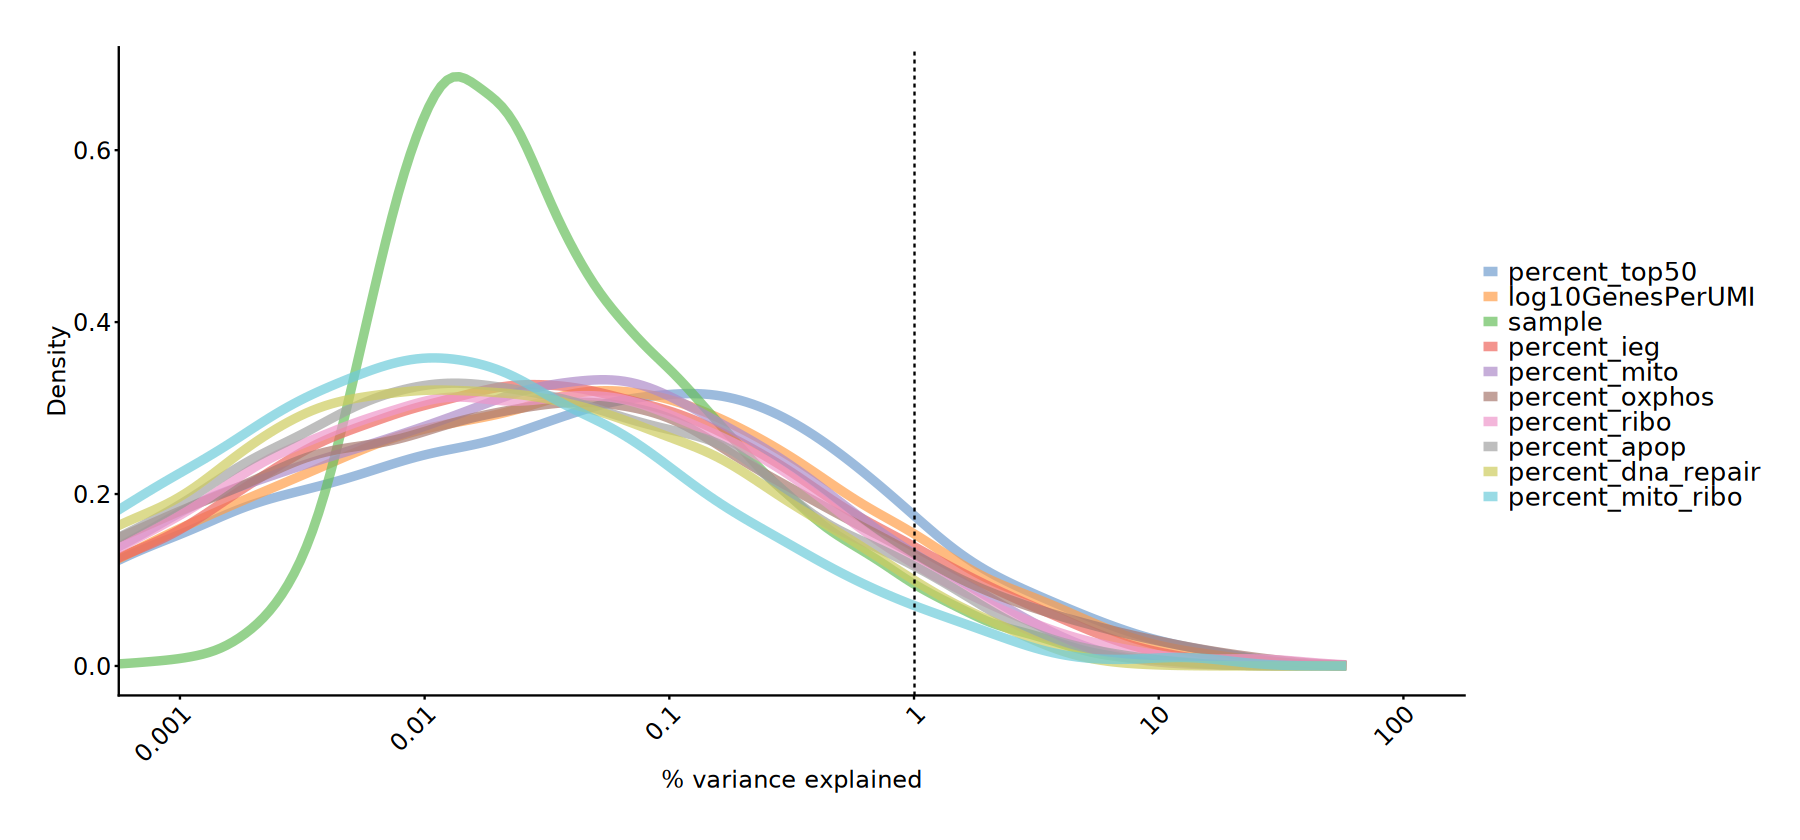

In [341]:
scater::plotExplanatoryVariables(vars) + my_theme + ggplot2::theme(plot.margin = unit(c(1, 1, 1, 1), "cm"))

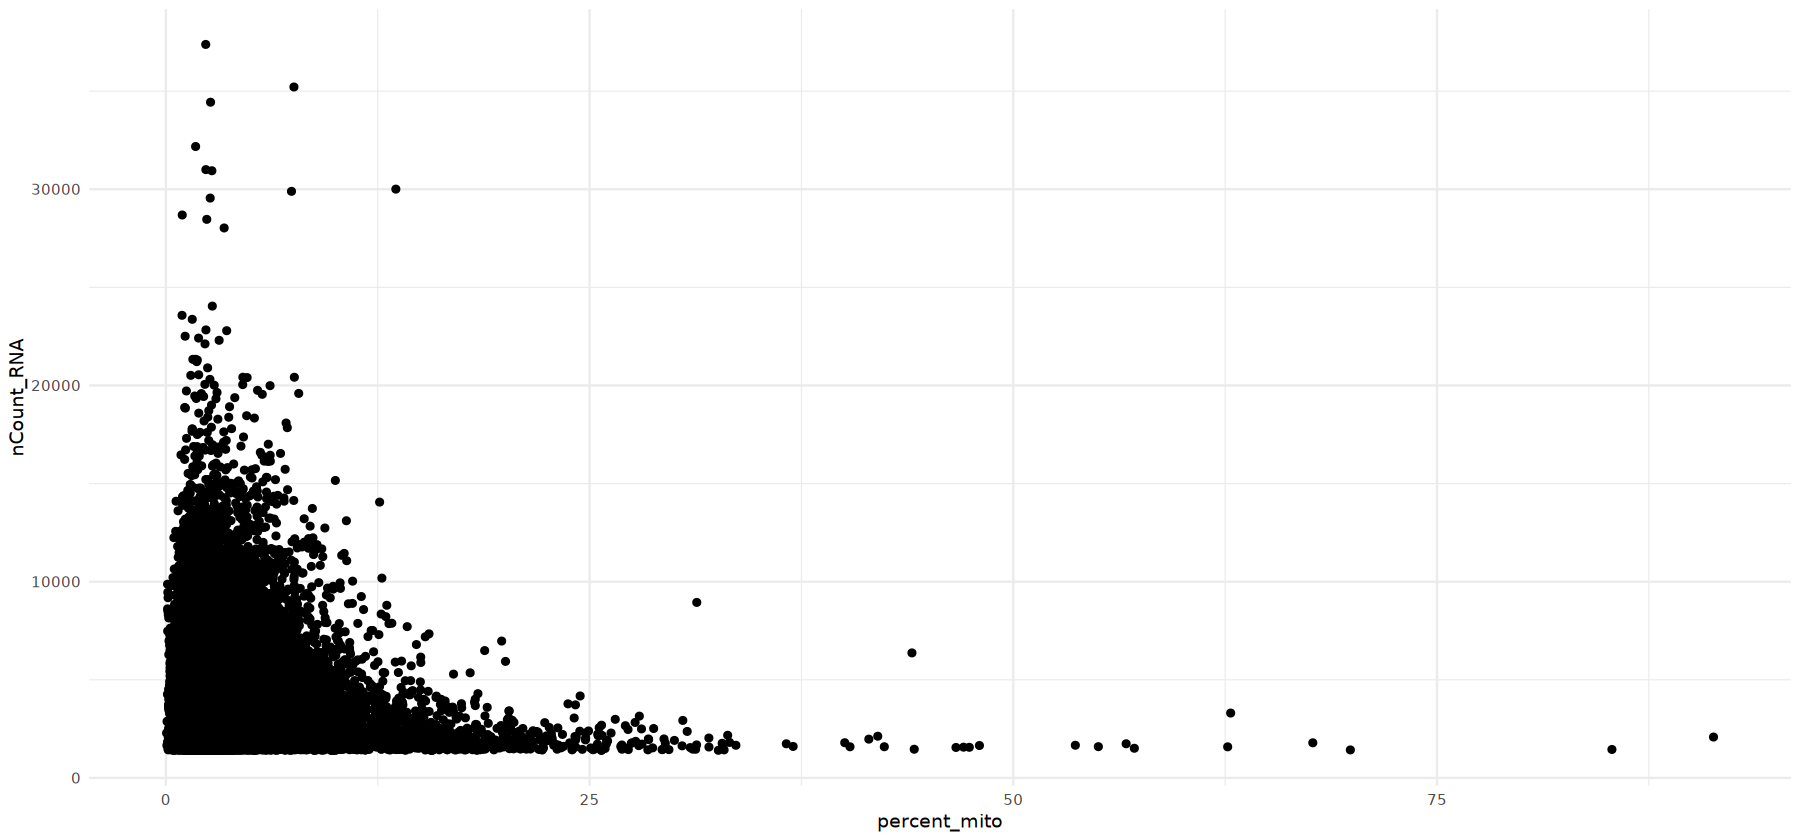

In [349]:
# ggcells directly takes the colData df of the sce object:

scater::ggcells(test_sce, mapping=aes(x=percent_mito, y=nCount_RNA)) +
    geom_point() + 
    theme_minimal()

From scran package vignette:

"The library size is defined as the total sum of counts across all relevant features for each cell. \
Here, we will consider the relevant features to be the endogenous genes. \
Cells with small library sizes are of low quality as the RNA has been lost at some point during library preparation, \
either due to cell lysis or inefficient cDNA capture and amplification. \
The number of expressed features in each cell is defined as the number of endogenous genes with non-zero counts \
for that cell. Any cell with very few expressed genes is likely to be of poor quality as the diverse transcript \
population has not been successfully captured.\
The proportion of reads mapped to spike-in transcripts is calculated relative to the total count across all features \
(including spike-ins) for each cell. As the same amount of spike-in RNA should have been added to each cell, \
any enrichment in spike-in counts is symptomatic of loss of endogenous RNA. Thus, high proportions are \
indicative of poor-quality cells where endogenous RNA has been lost due to, e.g., partial cell lysis \
or RNA degradation during dissociation.\
In the absence of spike-in transcripts, the proportion of reads mapped to genes in the mitochondrial \
genome can be used. High proportions are indicative of poor-quality cells (Islam et al. 2014; Ilicic et al. 2016), \
presumably because of loss of cytoplasmic RNA from perforated cells. The reasoning is that, in the presence of modest \
damage, the holes in the cell membrane permit efflux of individual transcript molecules but are too small to allow \
mitochondria to escape, leading to a relative enrichment of mitochondrial transcripts. For single-nuclei RNA-seq \
experiments, high proportions are also useful as they can mark cells where the cytoplasm has not been successfully stripped."

In [350]:
dec <- scran::modelGeneVar(test_sce)

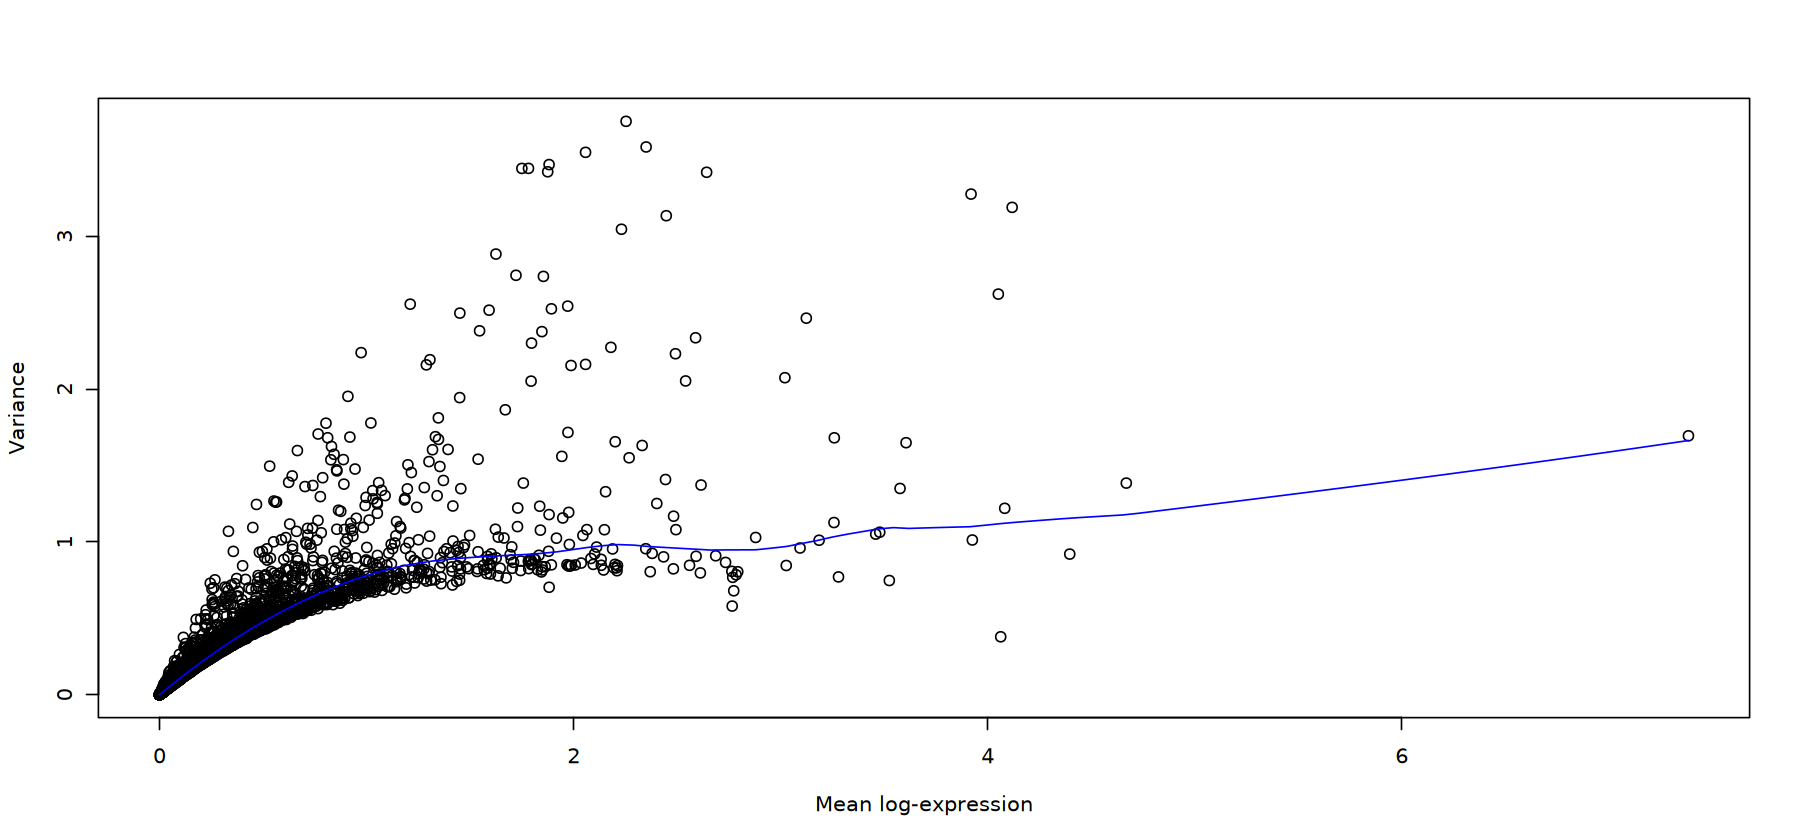

In [351]:
plot(dec$mean, dec$total, xlab="Mean log-expression", ylab="Variance")
curve(metadata(dec)$trend(x), col="blue", add=TRUE)

In [353]:
sessionInfo()

R version 4.4.2 (2024-10-31)
Platform: x86_64-unknown-linux-gnu
Running under: Red Hat Enterprise Linux 9.4 (Plow)

Matrix products: default
BLAS/LAPACK: /gnu/store/mj1kw87qd3m1q7r4844adkn5hifx8k6a-openblas-0.3.20/lib/libopenblasp-r0.3.20.so;  LAPACK version 3.9.0

locale:
 [1] LC_CTYPE=C          LC_NUMERIC=C        LC_TIME=C          
 [4] LC_COLLATE=C        LC_MONETARY=C       LC_MESSAGES=C.UTF-8
 [7] LC_PAPER=C          LC_NAME=C           LC_ADDRESS=C       
[10] LC_TELEPHONE=C      LC_MEASUREMENT=C    LC_IDENTIFICATION=C

time zone: Europe/Berlin
tzcode source: system (glibc)

attached base packages:
[1] stats4    stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
 [1] SingleCellExperiment_1.28.1 SummarizedExperiment_1.36.0
 [3] Biobase_2.66.0              GenomicRanges_1.58.0       
 [5] GenomeInfoDb_1.42.0         IRanges_2.40.0             
 [7] S4Vectors_0.44.0            BiocGenerics_0.52.0        
 [9] MatrixGenerics_1.18.0 